In [1]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

**Name: BJ ENRIK G. YEPES**

<center><img src="Header.png"/></center>

<center><h1 style="color:#5A59A8">Exploring Feature Transformation and How it Boosts Model Performance</h1></center>

In [2]:
# Data Prep
import numpy as np
import pandas as pd
import re

# ML
import scipy.stats as stat
from scipy.stats import skewnorm, norm, kurtosis


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import load_wine, load_iris, load_boston

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

# Custom plot format
plt.rcParams['figure.figsize'] = 16,6
plt.rcParams['lines.linewidth'] = 3.5
plt.rcParams['figure.titlesize'] = 32

custom_sns_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme('notebook', style='ticks', font_scale=1.5, rc=custom_sns_params)
colors = ['#5A59A8', '#E14C92', '#0094AD']
custom_palette = sns.blend_palette(colors, n_colors=3)
sns.set_palette(custom_palette)

<h1 style="color:#5A59A8">Executive Summary</h1>

<div style="text-align: justify">Getting accurate results is the goal of every machine learning project. But feeding data as it is to a model does not always give the desired outcome. And doing so will introduce certain biases to your machine learning model as it learns. One way to mitigate this problem is by feature transformation or feature scaling. But how would you exactly know what feature transformation technique to use in certain situations?</div>
&nbsp

<div style="text-align: justify">Data is transformed to make it better-organized. Transformed data may be easier for both humans and computers to use. [11] Feature transformation is an essential data preprocessing technique that ensures all of our metrics are uniform which allows for better model performance. This also ensures that algorithms moves smoothly and is applied and updated at the same rate for all features.</div>
&nbsp

<div style="text-align: justify">For this notebook, we will explore nine (9) data transformation techniques and how these techniques boosts model performance. These techniques will be divided into three main categories namely: Function Transformation, Power Transformation, and Other Transformation. </div>
&nbsp

<div style="text-align: justify">To simulate the various situations that we usually encounter in common day to day data.</div>

<h1 style="color:#5A59A8">Introduction</h1>

<h2 style="color:#E14C92">Transformation of Features</h2>

<h3 style="color:#0094AD">What is Feature Transformation?</h3>

1. <div style="text-align: justify">It is a technique by which we can boost our model performance. Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis. [1]</div>


2. <div style="text-align: justify">It is also known as Feature Engineering, which is creating new features from existing features that may help in improving the model performance. [1]</div>


3. <div style="text-align: justify">It refers to the family of algorithms that create new features using the existing features. These new features may not have the same interpretation as the original features, but they may have more explanatory power in a different space rather than in the original space. [1]</div>


4. <div style="text-align: justify">This can also be used for Feature Reduction. It can be done in many ways, by linear combinations of original features or by using non-linear functions. [1]</div>


5. <div style="text-align: justify">It helps machine learning algorithms to converge faster. [1]</div>

<h3 style="color:#0094AD">What are the Different Types Transformation?</h3>

1. <div style="text-align: justify"> Function Transformation </div>
2. <div style="text-align: justify"> Power Transformation </div>
3. <div style="text-align: justify"> Other Transformation </div>

<h2 style="color:#E14C92">Function Transformation</h2>

**Log Transformation**

<div style="text-align: justify">The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. [2]</div>

**Reciprocal Transformation**

<div style="text-align: justify">The reciprocal transformation is defined as the transformation of x to 1/x. The transformation has a dramatic effect on the shape of the distribution, reversing the order of values with the same sign. The transformation can only be used for non-zero values. [3]</div>

**Square Transformation**

<div style="text-align: justify">The square root, x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape: it is weaker than the logarithm and the cube root. It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values. Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small. [4]</div>

**Square Root Transformation**

<div style="text-align: justify">The square, x to x^2, has a moderate effect on distribution shape and it could be used to reduce left skewness. In practice, the main reason for using it is to fit a response by a quadratic function y = a + b x + c x^2. [4]</div>

<h2 style="color:#E14C92">Power Transformation</h2>

**Box-Cox Transformation**

<div style="text-align: justify">A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. [6]</div>

**Yeo-Johnson Transformation**

<div style="text-align: justify">The Yeo-Johnson family of transformations modifies and generalizes the Box-Cox family to handle data where the smallest value of y may be zero or negative. For non-negative values of y, it finds the Box-Cox transformation of y+1. [7]</div>

<h2 style="color:#E14C92">Other Transformation</h2>

**Normalization and Standardization**
1. <div style="text-align: justify">Normalization is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution. [8]</div>

2. <div style="text-align: justify">Normalization scales in a range of [0,1] or [-1,1]. Standardization is not bounded by range. [8]</div>

3. <div style="text-align: justify">Normalization is highly affected by outliers. Standardization is slightly affected by outliers. [8]</div>

4. <div style="text-align: justify">Normalization is considered when the algorithms do not make assumptions about the data distribution. Standardization is used when algorithms make assumptions about the data distribution. [8]</div>

**Min-Max Scaling**
1. <div style="text-align: justify">MinMax Scaler is one of the most popular scaling algorithms. It transforms features by scaling each feature to a given range, which is generally [0,1], or [-1,-1] in case of negative values. [9]</div>

2. <div style="text-align: justify">It subtracts the mean of the column from each value and then divides by the range, i.e, max(x)-min(x). [9]</div>

3. <div style="text-align: justify">This scaling algorithm works very well in cases where the standard deviation is very small, or in cases which don’t have Gaussian distribution. [9]</div>

**Quantile and Median Scaling**
1. <div style="text-align: justify">When scaling variables to the median and quantiles, the median value is removed from the observations and the result is divided by the inter-quartile range (IQR). The IQR is the range between the 1st quartile and the 3rd quartile, or, in other words, the range between the 25th quantile and the 75th quantile. [10]</div>

2. <div style="text-align: justify">This method is known as robust scaling because it produces more robust estimates for the center and value range of the variable, and is recommended if the data contains outliers. [10]</div>

<h2 style="color:#E14C92">Summary of Transformations</h2>

1. Normalization and Standardization
2. Min-Max Scaling
3. Robust Scaling
4. Log Transformation
5. Reciprocal Transformation
6. Square Transformation
7. Square Root Transformation
8. Quantile Transformation
9. Box-Cox Transformation
10. Yeo-Johnson Transformation



<h2 style="color:#E14C92">Problem Statement</h2>

How does feature transformation improve model performance? Particularly:

1. What are the advantages of each type of feature transformation?
2. How should we choose the type of transformation to use?

<h1 style="color:#5A59A8">Simulation Setup</h1>

**For our simulation setup, we want to create three synthetic datasets namely:**

1. Zero Skew
2. Left Skew
3. Right Skew

<center><font size=5 color="#4E4F75"> Histplot and KDE of  </font><font color="#0094AD" size=5><b>Skewness Types </b></font></center>

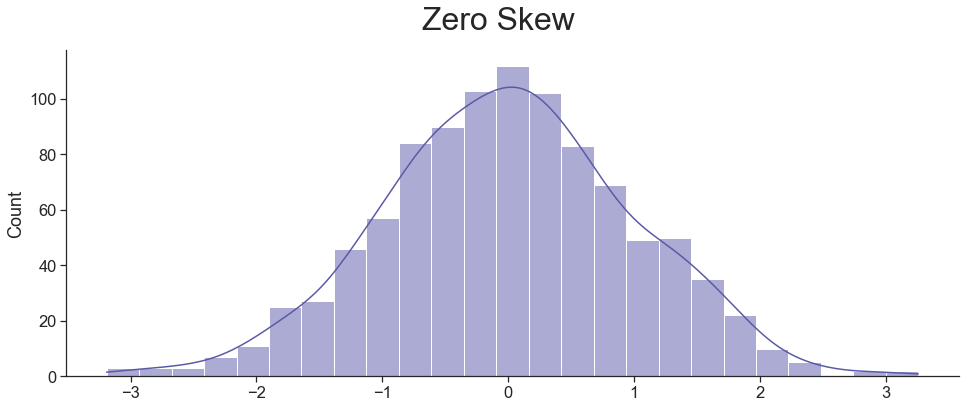

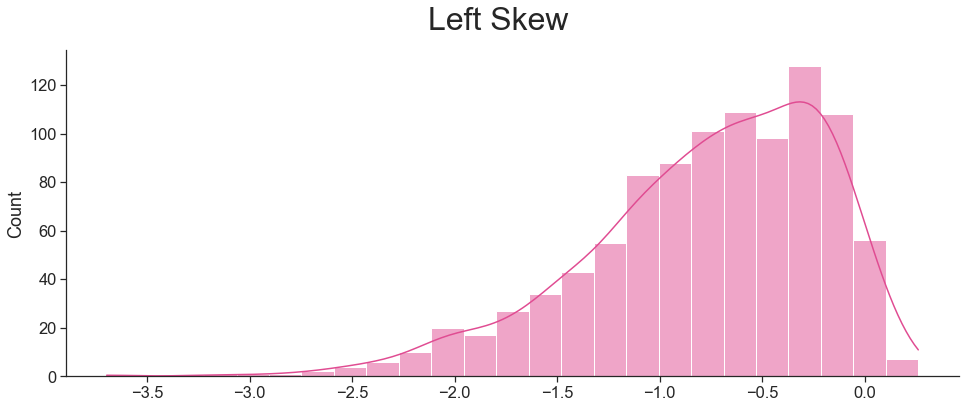

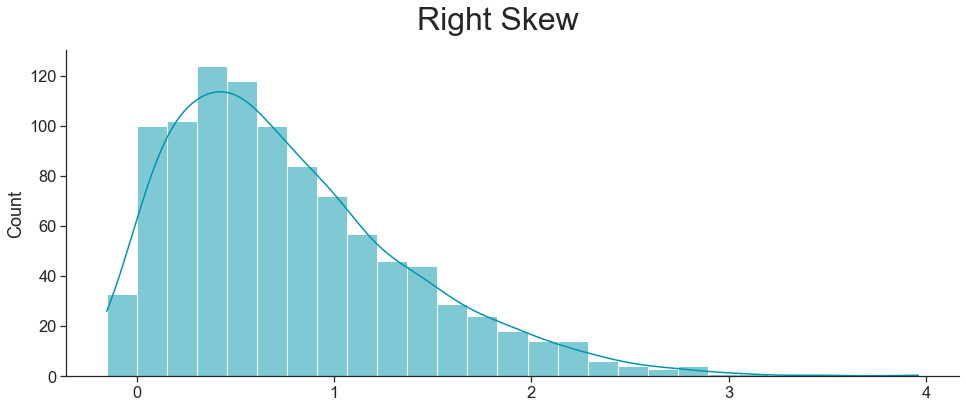

In [3]:
np.random.seed(1)

a=10
df_right = skewnorm.rvs(a, size=1000)
df_left = skewnorm.rvs(-a, size=1000)
df_norm = skewnorm.rvs(0, size=1000)

data_dict = {'Zero Skew': df_norm,
             'Left Skew': df_left,
             'Right Skew': df_right}

for k, v in data_dict.items():
    index = list(data_dict.keys()).index(k)
    plt.subplots(1, 1)
    sns.histplot(v, kde=True, color=custom_palette[index])
    plt.suptitle(k)

<h2 style="color:#E14C92">Wines Recognition Dataset</h2>

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

Original Owners: 

Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies,
Via Brigata Salerno, 16147 Genoa, Italy.

Citation:

Lichman, M. (2013). UCI Machine Learning Repository
[https://archive.ics.uci.edu/ml]. Irvine, CA: University of California,
School of Information and Computer Science. 

.. topic:: References

  (1) S. Aeberhard, D. Coomans and O. de Vel, 
  Comparison of Classifiers in High Dimensional Settings, 
  Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of  
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Technometrics). 

  The data was used with many others for comparing various 
  classifiers. The classes are separable, though only RDA 
  has achieved 100% correct classification. 
  (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) 
  (All results using the leave-one-out technique) 

  (2) S. Aeberhard, D. Coomans and O. de Vel, 
  "THE CLASSIFICATION PERFORMANCE OF RDA" 
  Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of 
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Journal of Chemometrics).


<h2 style="color:#E14C92">Iris Plants Dataset</h2>

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

<h2 style="color:#E14C92">Data Assumptions and Limitations</h2>

<h1 style="color:#5A59A8">Methodology</h1>

<center><img src="Methodology.png"/></center>

<h2 style="color:#E14C92">Data Preparation</h2>

In [4]:
df = pd.DataFrame(data_dict)
df

,Zero Skew,Left Skew,Right Skew
0,0.924755,-0.494760,1.601036
1,1.128890,-0.216931,0.850764
2,-1.128791,-0.544018,0.475004
3,-0.724738,-0.750328,1.099886
4,0.623571,-2.072435,0.710755
...,...,...,...
995,0.224605,-0.755532,0.097102
996,-0.477144,-0.524008,2.210183
997,0.691212,-0.065939,0.160988
998,-0.788731,-1.455597,0.416530


In [5]:

df_wine_x = pd.DataFrame(data=load_wine()['data'], columns=load_wine()['feature_names'])
df_wine_x = df_wine_x[['alcohol', 'malic_acid', 'magnesium', 'proline']]
df_wine = df_wine_x.copy()
df_wine['target'] = load_wine().target
df_wine

,alcohol,malic_acid,magnesium,proline,target
0,14.23,1.71,127.0,1065.0,0
1,13.20,1.78,100.0,1050.0,0
2,13.16,2.36,101.0,1185.0,0
3,14.37,1.95,113.0,1480.0,0
4,13.24,2.59,118.0,735.0,0
...,...,...,...,...,...
173,13.71,5.65,95.0,740.0,2
174,13.40,3.91,102.0,750.0,2
175,13.27,4.28,120.0,835.0,2
176,13.17,2.59,120.0,840.0,2


In [6]:
load_wine().keys() # For Deletion

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

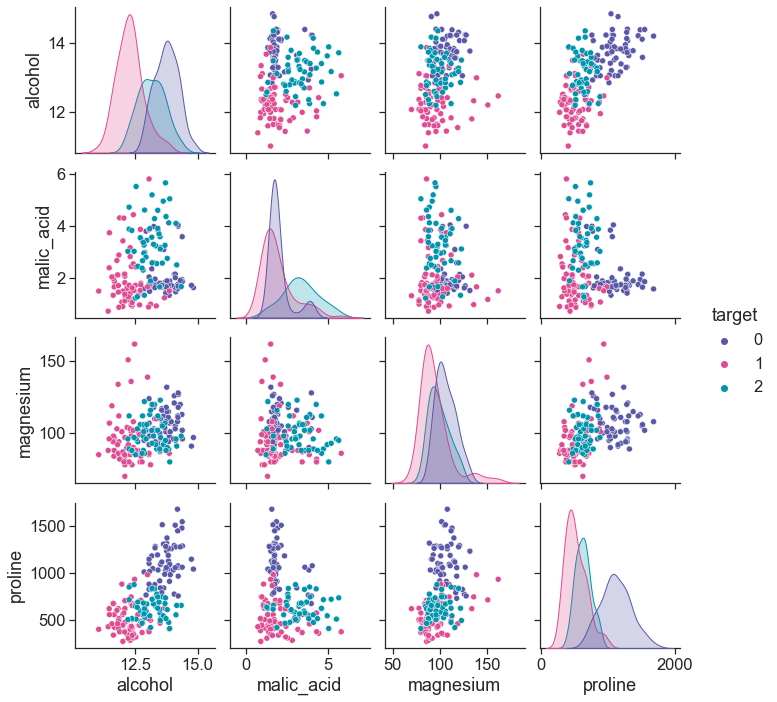

In [7]:
sns.pairplot(data=df_wine, hue='target', palette=custom_palette)
plt.show()

We can easily observe from the pair plot above that each feature is operating under different scales.
If we feed this directly to the model, `proline` will have the most impact on feature importance and model accuracy since its values range from the hundreds to thousands, unlike other features.

If we create a histogram for all values, the x axis spans all the way the thousands (between 1500 and 1750). We can fix this by using `feature transformation`.

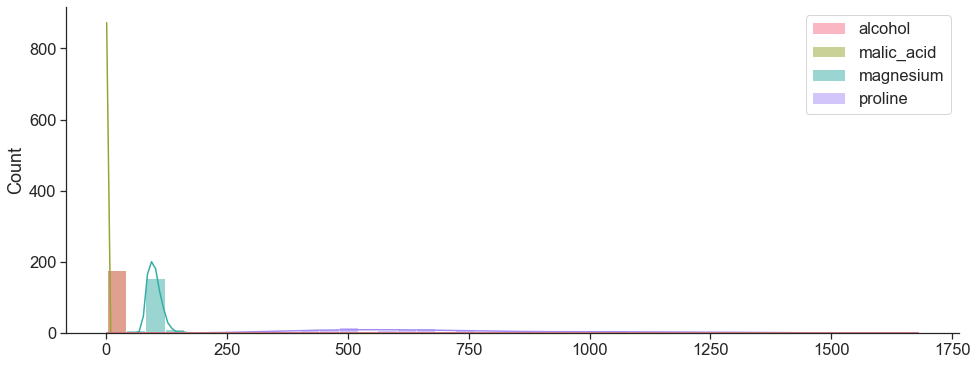

In [8]:
sns.histplot(df_wine_x, kde=True)
plt.show()

<center><font size=5 color="#4E4F75"> Looking into </font> 
<font color="#5A59A8" size=5><b>Normalization and Standardization, </b></font> 
<font color="#E14C92" size=5><b>MinMax Scaling, </b></font>
<center><font size=5 color="#4E4F75"> and </font>
<font color="#0094AD" size=5><b>Robust Scaling </b></font></center>

<h2 style="color:#E14C92">Normalization and Standardization</h2>

$$z=\frac{x_i-\mu}{\sigma}$$

1. Standardize features by removing the mean and scaling to unit variance.
2. Mean = 0, Standard Deviation = 1
3. StandardScaler does not guarantee a balanced feature scales in the presence of outliers.

In [9]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_wine_x)
X_df = pd.DataFrame(data=scaled_X, columns=['alcohol', 'malic_acid', 'magnesium', 'proline'])
X_df.describe().round(2)

,alcohol,malic_acid,magnesium,proline
count,178.00,178.00,178.00,178.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-2.09,-1.49
25%,-0.79,-0.66,-0.82,-0.78
50%,0.06,-0.42,-0.12,-0.23
75%,0.84,0.67,0.51,0.76
max,2.26,3.11,4.37,2.97


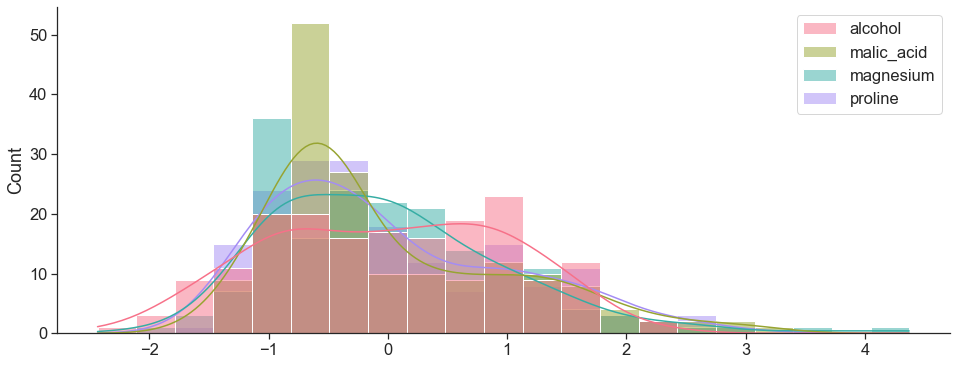

In [10]:
sns.histplot(X_df, kde=True)
plt.show()

After centering the mean to zero, and setting the standard deviation to 1 by using the Standard Scaler, we can now say that our features are operating under the same scale. Let us try other other scalers.

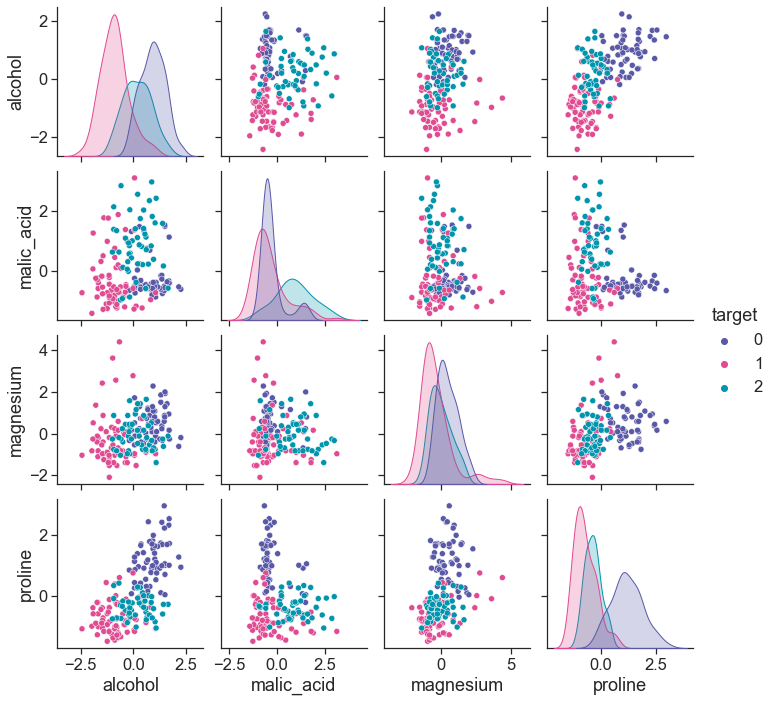

In [11]:
all_df = X_df.copy()
all_df['target'] = load_wine().target

sns.pairplot(all_df, hue='target', palette=custom_palette)
plt.show()

<h2 style="color:#E14C92">MinMax Scaling</h2>

$$ x^\prime=\frac{x-min(x)}{max(x)-min(x)} $$

1. The range of features to scale in [0, 1] or [−1, 1].
2. Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

In [12]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(df_wine_x)
X_df = pd.DataFrame(data=scaled_X, columns=['alcohol', 'malic_acid', 'magnesium', 'proline'])
X_df.describe().round(2)

,alcohol,malic_acid,magnesium,proline
count,178.00,178.00,178.00,178.00
mean,0.52,0.32,0.32,0.33
std,0.21,0.22,0.16,0.22
min,0.00,0.00,0.00,0.00
25%,0.35,0.17,0.20,0.16
50%,0.53,0.22,0.30,0.28
75%,0.70,0.46,0.40,0.50
max,1.00,1.00,1.00,1.00


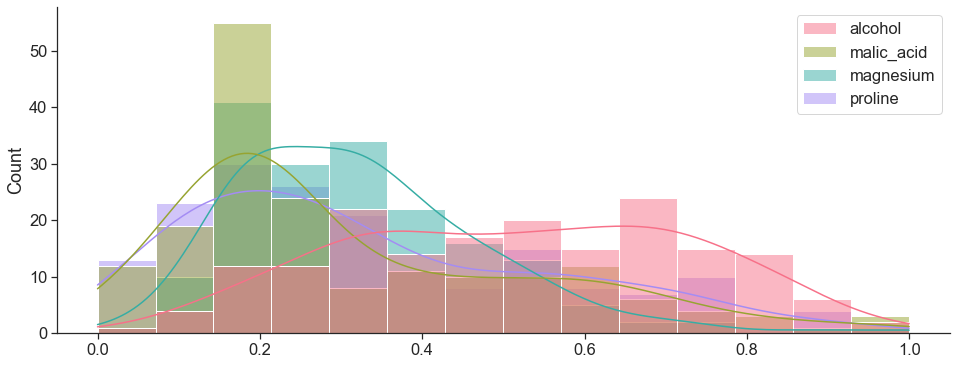

In [13]:
sns.histplot(X_df, kde=True)
plt.show()

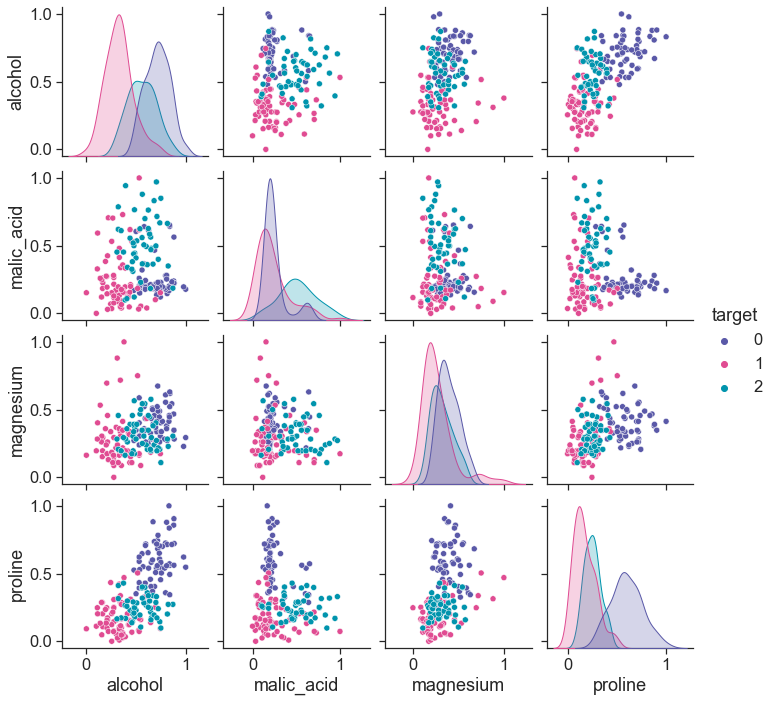

In [14]:
all_df = X_df.copy()
all_df['target'] = load_wine().target
sns.pairplot(all_df, hue='target', palette=custom_palette)
plt.show()

<h2 style="color:#E14C92">Robust Scaling</h2>


$$ IQR=Q_3-Q_1 $$

$$ x^\prime = \frac{x-median(x)}{IQR} $$

$$ x^\prime = \frac{x-median(x)}{Q_3-Q_1} $$

1. Transforms x by subtracting each value of features by the `median` and dividing it by the `interquartile range` between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)
2. Based on percentiles and are therefore not influenced by a small number of very large marginal outliers.

In [15]:
scaler = RobustScaler()
scaled_X = scaler.fit_transform(df_wine_x)
X_df = pd.DataFrame(data=scaled_X, columns=['alcohol', 'malic_acid', 'magnesium', 'proline'])
X_df.describe().round(2)

,alcohol,malic_acid,magnesium,proline
count,178.00,178.00,178.00,178.00
mean,-0.04,0.32,0.09,0.15
std,0.62,0.75,0.75,0.65
min,-1.54,-0.76,-1.47,-0.82
25%,-0.52,-0.18,-0.53,-0.36
50%,0.00,-0.00,0.00,0.00
75%,0.48,0.82,0.47,0.64
max,1.35,2.66,3.37,2.08


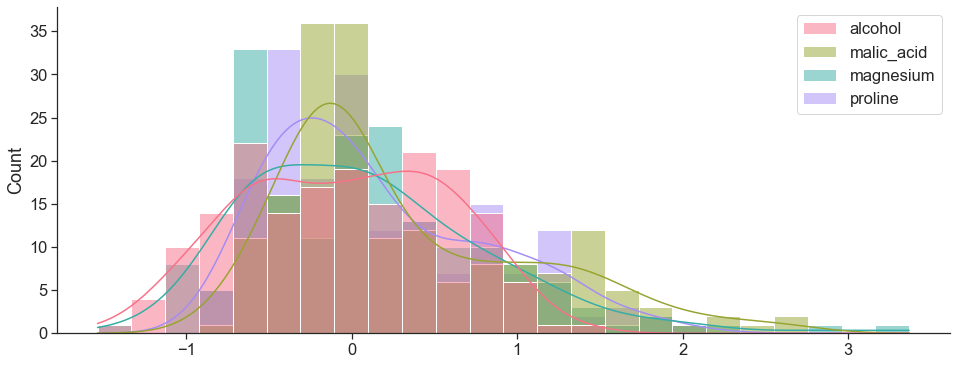

In [16]:
sns.histplot(X_df, kde=True)
plt.show()

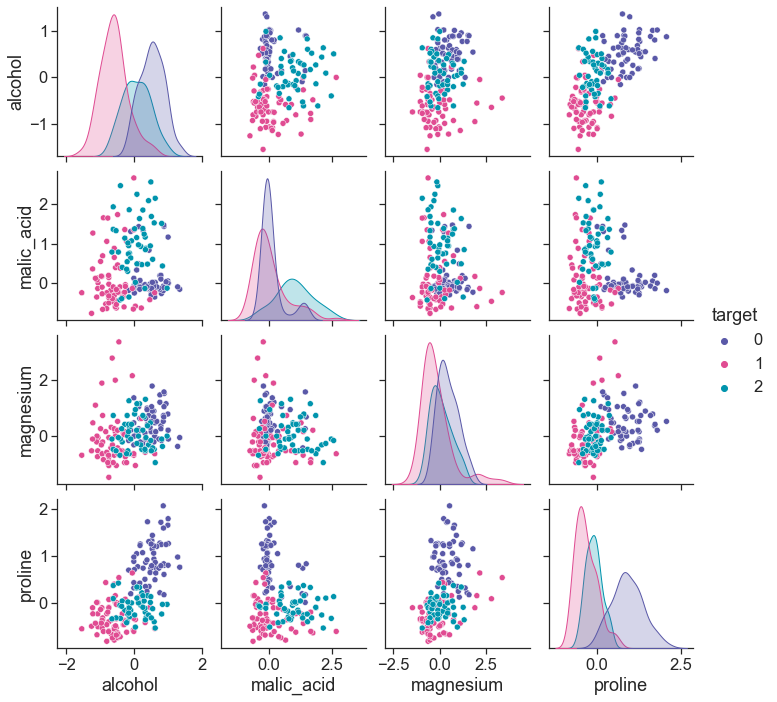

In [17]:
all_df = X_df.copy()
all_df['target'] = load_wine().target
sns.pairplot(all_df, hue='target', palette=custom_palette)
plt.show()

<center><img src="Gaussian.png"/></center>

<center><font size=5 color="#4E4F75"> Most machine learning models like </font> 
<font color="#5A59A8" size=5><b>Linear Regression, </b></font> 
<font color="#E14C92" size=5><b>Logistic Regression, </b></font>
<center><font size=5 color="#4E4F75"> and </font>
<font color="#0094AD" size=5><b>Artificial Neural Networks </b></font>
<font size=5 color="#4E4F75"> assume that the features are Normally Distributed </font> </center>

For Gaussian Transformation, let's use the synthetic data that we created earlier.

In [18]:
def plot_qq(df, feature):
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

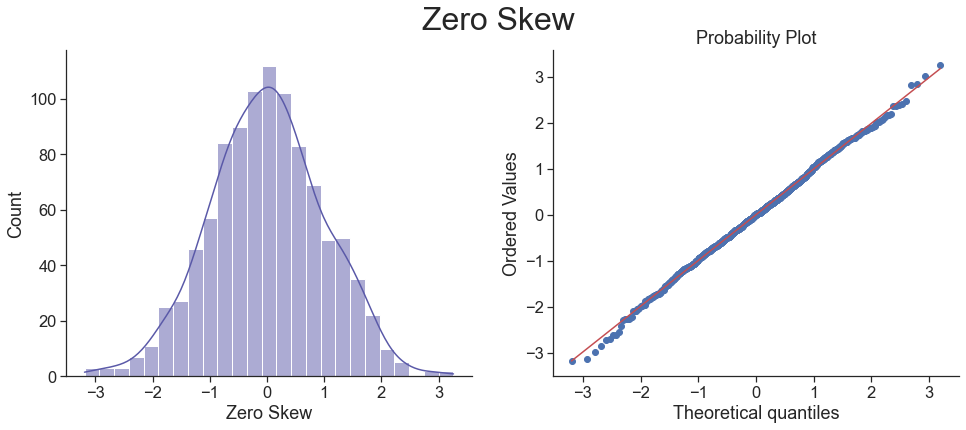

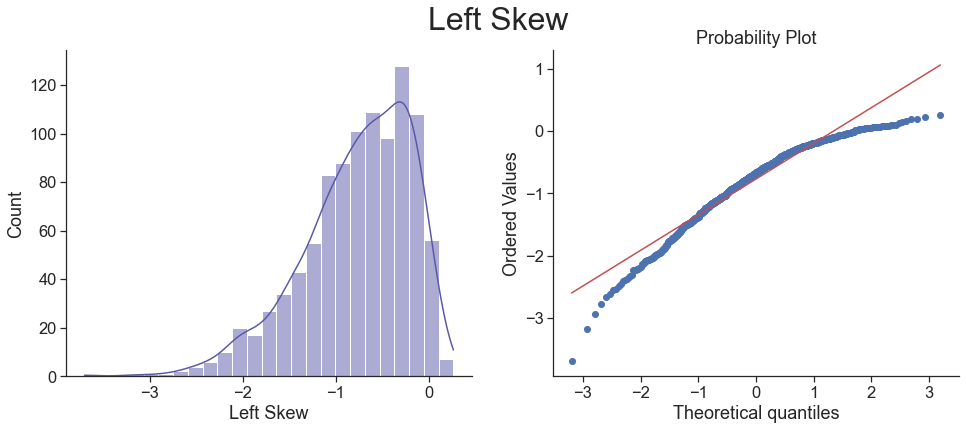

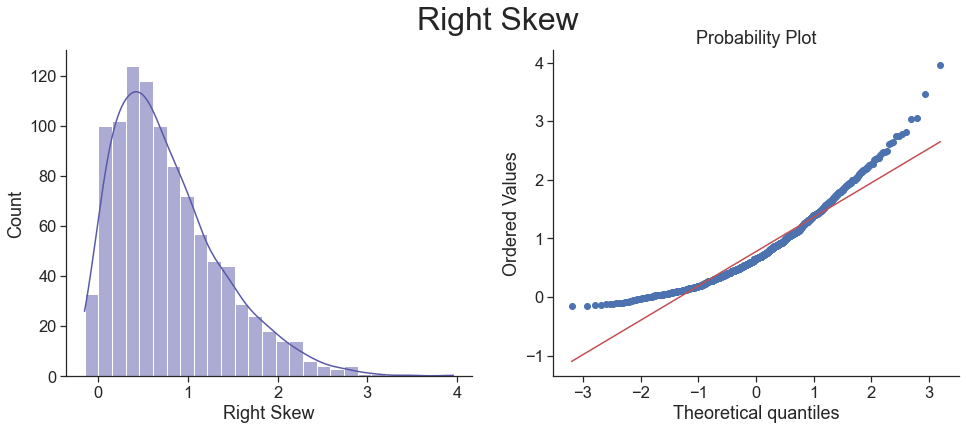

In [19]:
for i in df.columns:
    plt.suptitle(i)
    plot_qq(df, i)

<center><font size=5 color="#4E4F75"> Looking into Function Transformation: </font> 
<font color="#5A59A8" size=5><b>Log Transformation, </b></font> 
<font color="#E14C92" size=5><b>Reciprocal Transformation, </b></font>
<font color="#0094AD" size=5><b>Square Transformation, </b></font>
<font size=5 color="#4E4F75"> and </font>
<font color="#5A59A8" size=5><b>Square Root Transformation </b></font>
<font size=5 color="#4E4F75"> and analyzing their Q-Q Plots</font> </center>

<h2 style="color:#E14C92">Log Transformation</h2>

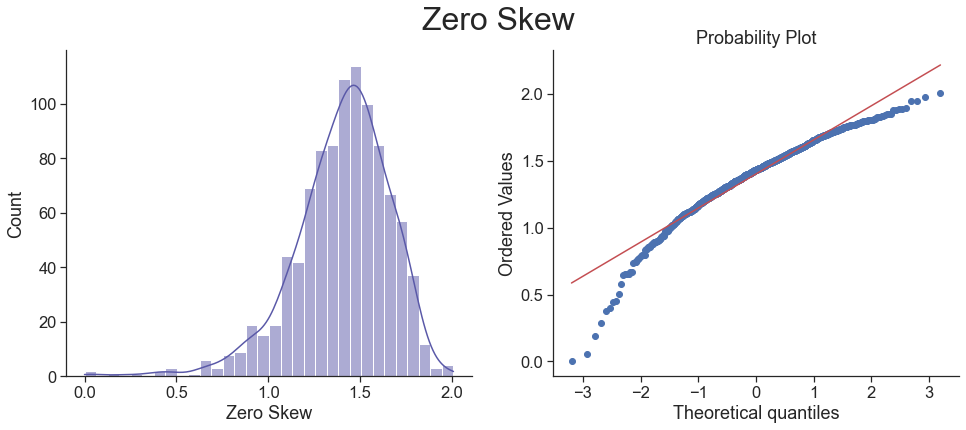

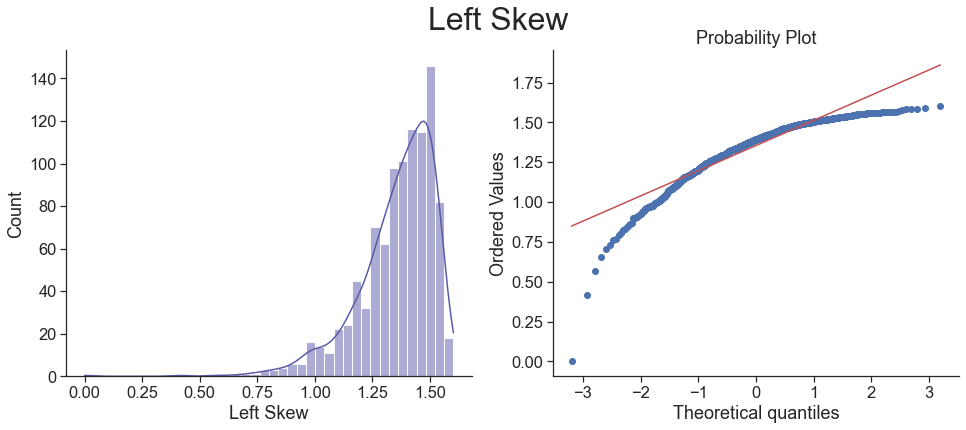

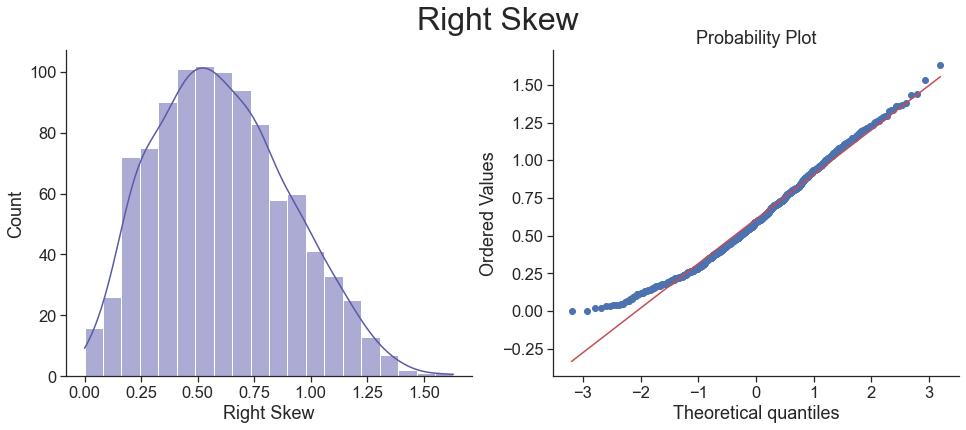

In [20]:
df_log = df + abs(df.min().to_numpy()) + 1

transformer = FunctionTransformer(np.log)
transformed_X = transformer.fit_transform(df_log)
log_df = pd.DataFrame(data=transformed_X, columns=df.columns)

for i in log_df.columns:
    plt.suptitle(i)
    plot_qq(log_df, i)

<h2 style="color:#E14C92">Reciprocal Transformation</h2>

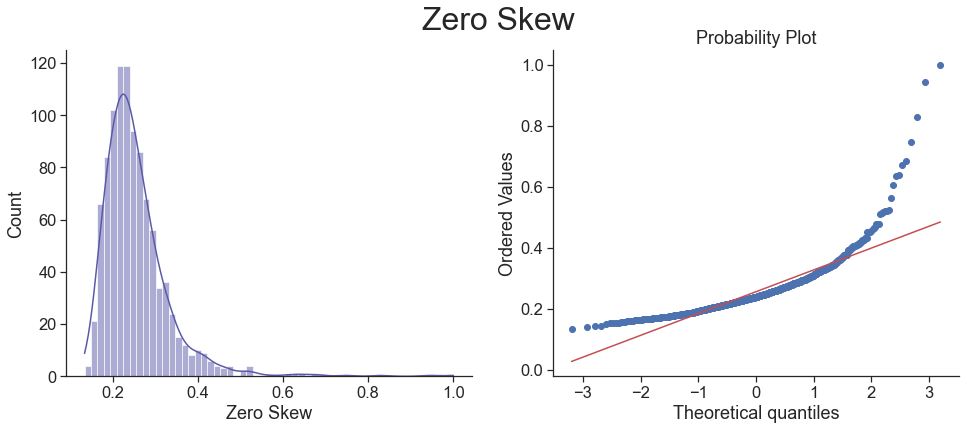

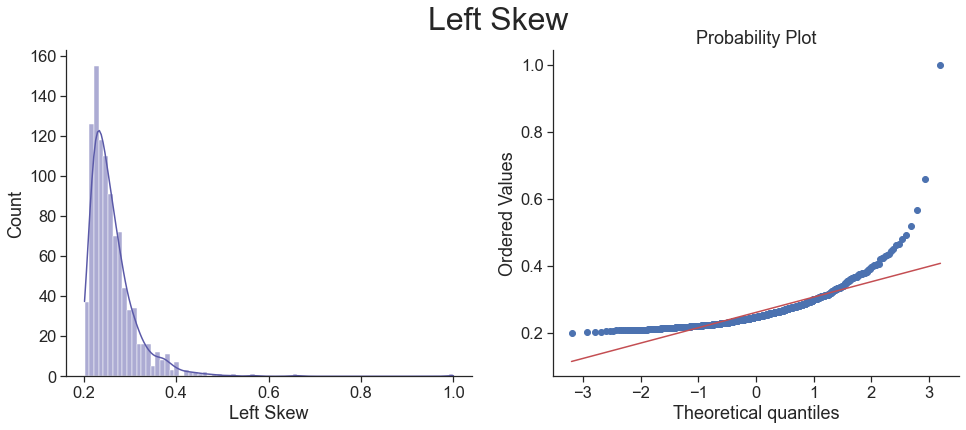

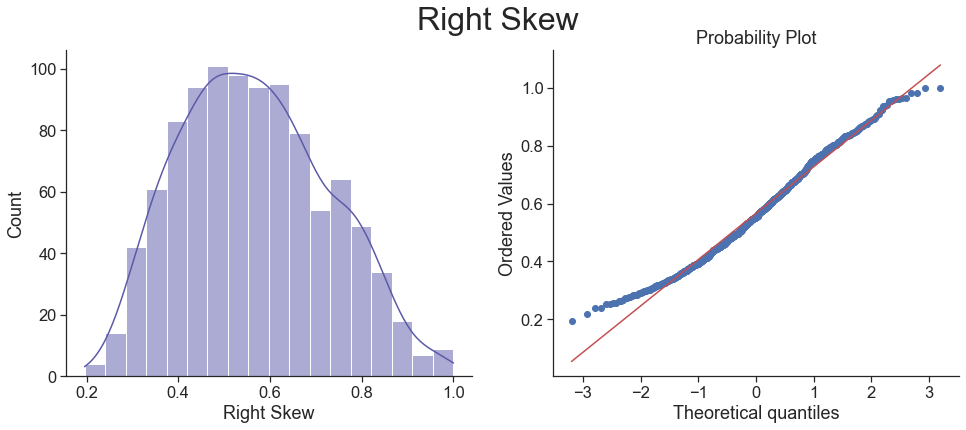

In [21]:
df_recip = df + abs(df.min().to_numpy()) + 1
transformer = FunctionTransformer(np.reciprocal)
transformed_X = transformer.fit_transform(df_recip)
recip_df = pd.DataFrame(data=transformed_X, columns=df.columns)

for i in recip_df.columns:
    plt.suptitle(i)
    plot_qq(recip_df, i)

<h2 style="color:#E14C92">Square Transformation</h2>

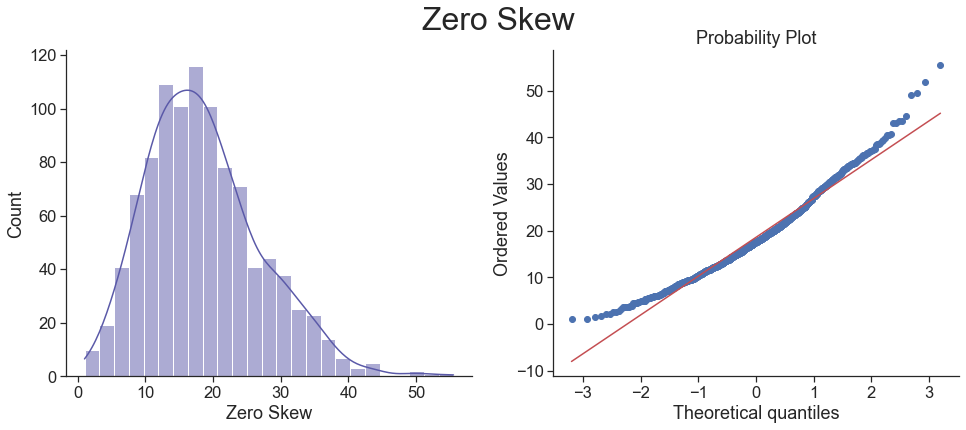

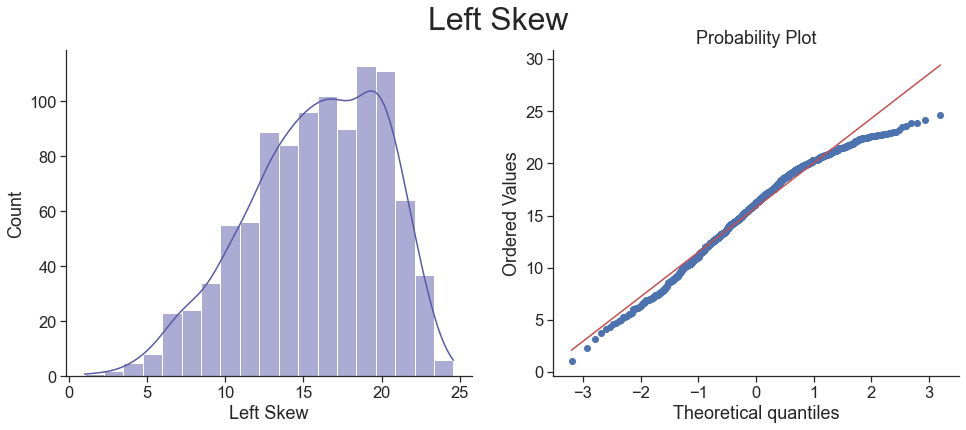

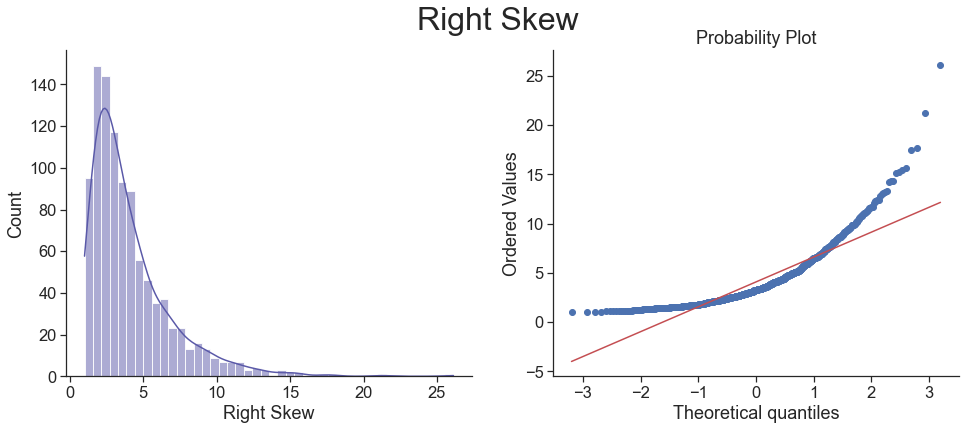

In [22]:
df_sq = df + abs(df.min().to_numpy()) + 1

transformer = FunctionTransformer(np.square)
transformed_X = transformer.fit_transform(df_sq)
sq_df = pd.DataFrame(data=transformed_X, columns=df.columns)

for i in sq_df.columns:
    plt.suptitle(i)
    plot_qq(sq_df, i)

<h2 style="color:#E14C92">Square Root Transformation</h2>

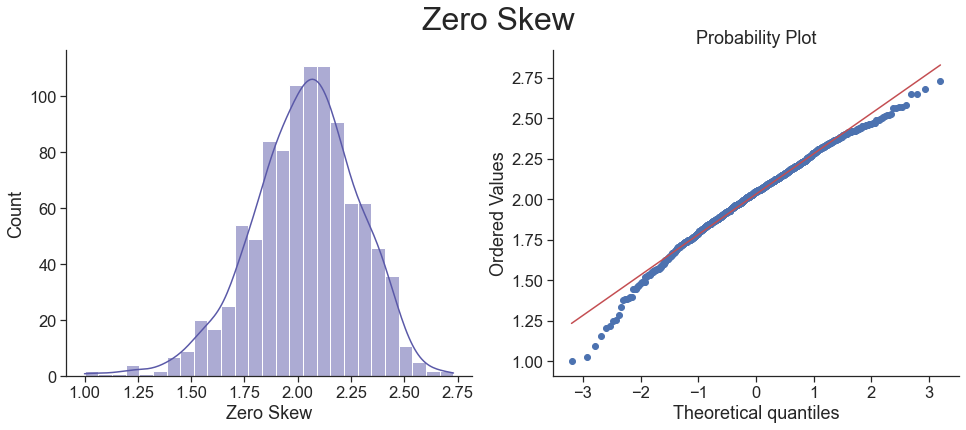

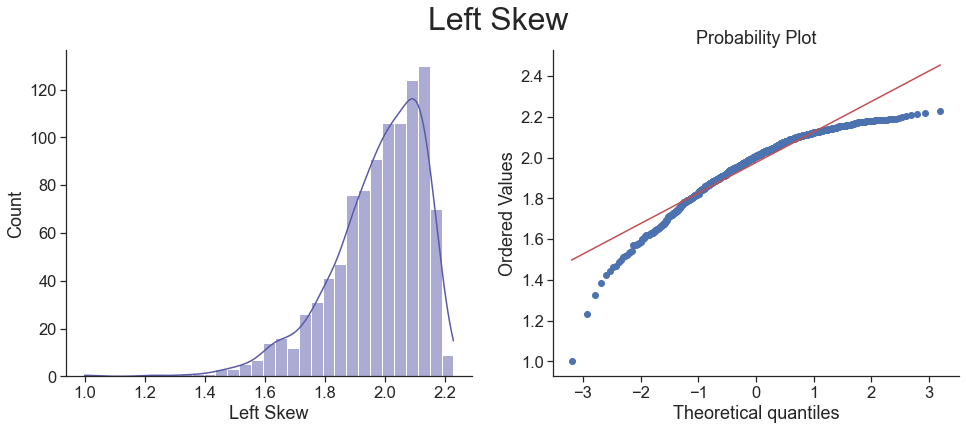

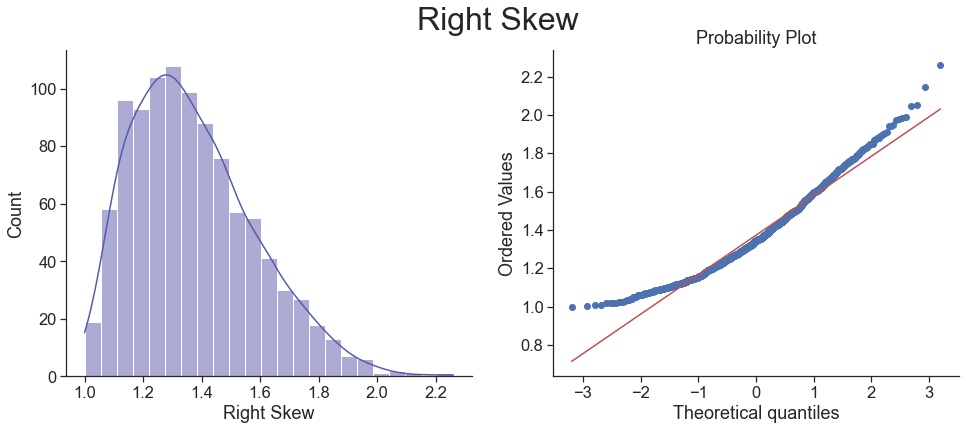

In [23]:
df_sqrt = df + abs(df.min().to_numpy()) + 1

transformer = FunctionTransformer(np.sqrt)
transformed_X = transformer.fit_transform(df_sqrt)
sqrt_df = pd.DataFrame(data=transformed_X, columns=df.columns)

for i in sqrt_df.columns:
    plt.suptitle(i)
    plot_qq(sqrt_df, i)

<center><font size=5 color="#4E4F75"> Summary of how the </font> 
<font color="#5A59A8" size=5><b>Function Transformations </b></font>
<font size=5 color="#4E4F75"> changed the features</font> </center>

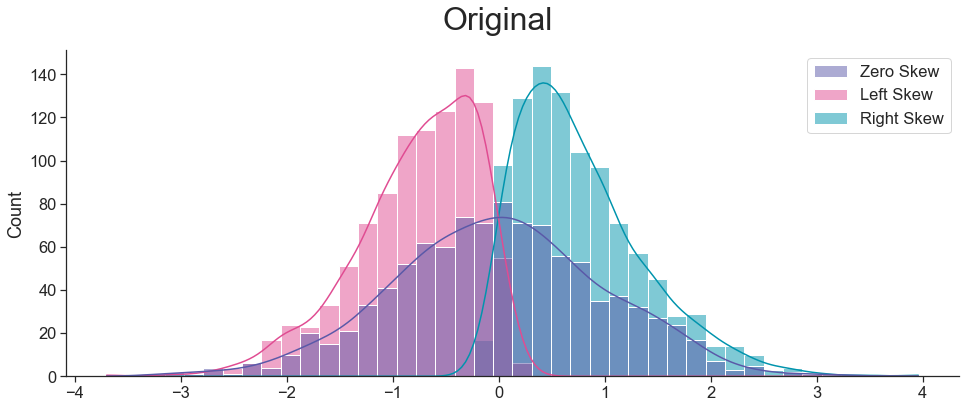

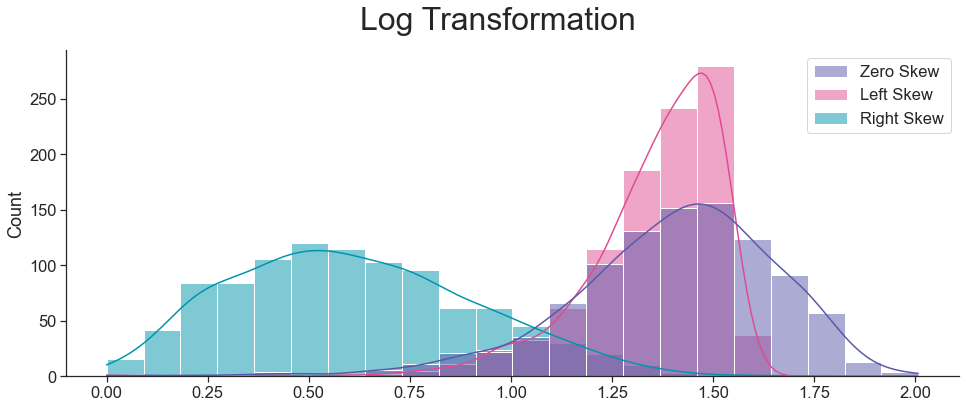

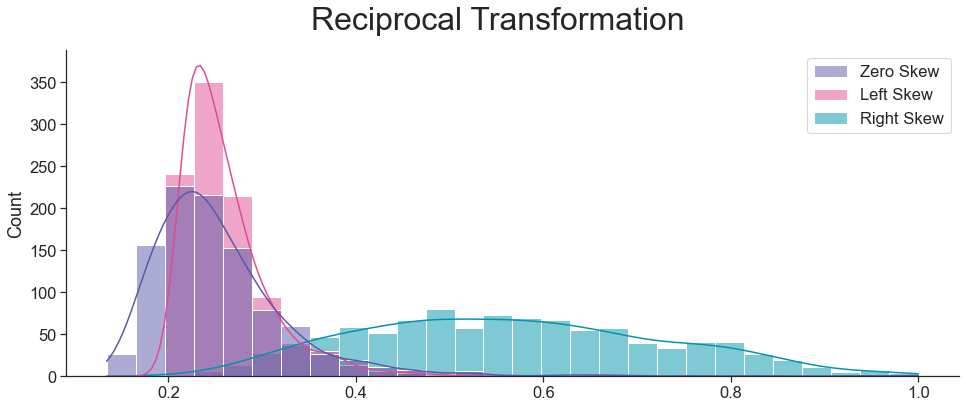

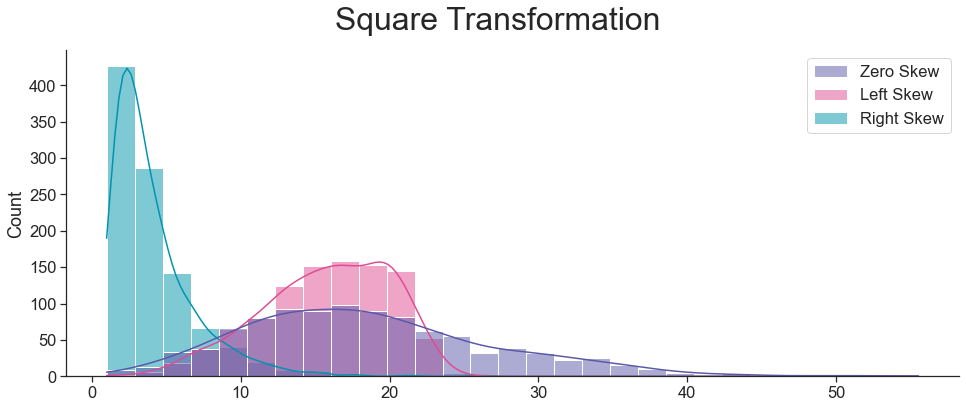

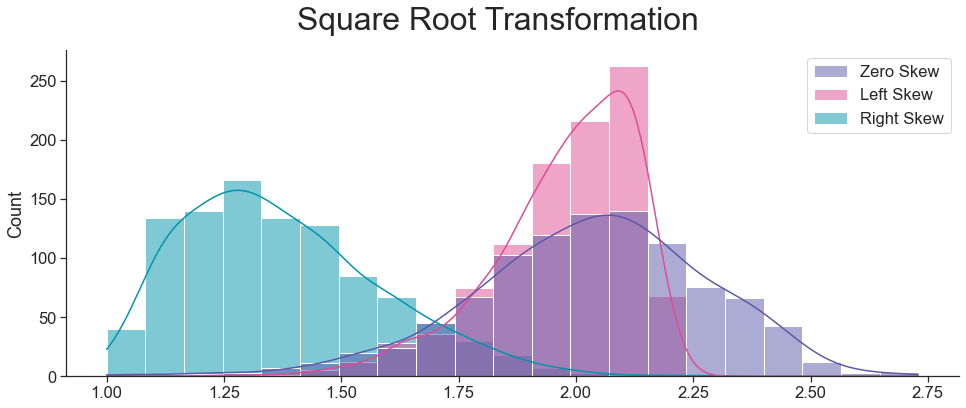

In [24]:
func_dict = {'Original': df,
             'Log Transformation': log_df,
             'Reciprocal Transformation': recip_df,
             'Square Transformation': sq_df,
             'Square Root Transformation': sqrt_df}

for k, v in func_dict.items():
    plt.subplots(1, 1)
    sns.histplot(v, kde=True)
    plt.suptitle(k)

Observations:
1. Function Transformations, specifically Log, Reciprocal, Square, and Square Root, does not work well with negative values. Hence data should be shifted.
2. We can shift the data by adding the minimum value and 1.
3. Log Transformation, Reciprocal Transformation, and Square Root Transformation works well with right skewed data.
4. Square Transformation works well with left skewed data.
5. Square Root Transformation is weaker than Log Transformation and Reciprocal Transformation.

<center><font size=5 color="#4E4F75"> Looking into </font> 
<font color="#5A59A8" size=5><b>Box-Cox Transformation, </b></font> 
<font color="#E14C92" size=5><b>Yeo-Johnson Transformation, </b></font>
<font size=5 color="#4E4F75"> and </font>
<font color="#0094AD" size=5><b>Quantile Transformation, </b></font>
<font size=5 color="#4E4F75"> and analyzing their Q-Q Plots</font> </center>

<h2 style="color:#E14C92">Box-Cox Transformation</h2>

In [25]:
def plot_qq(df, feature):
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

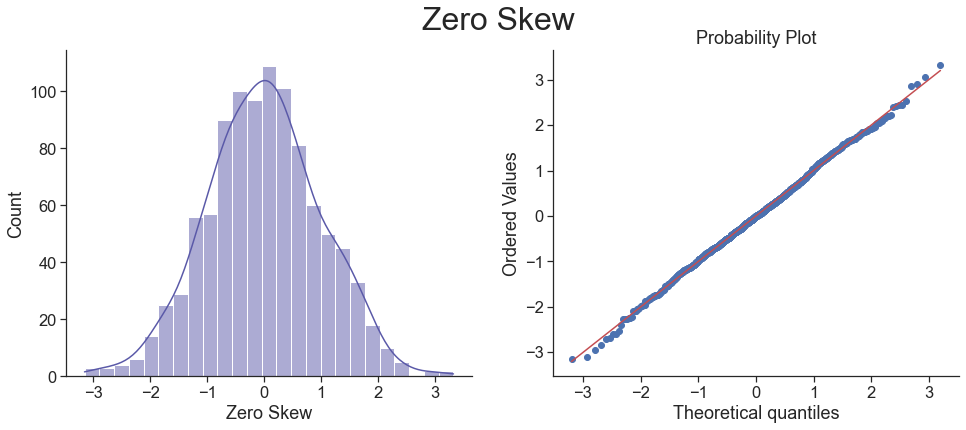

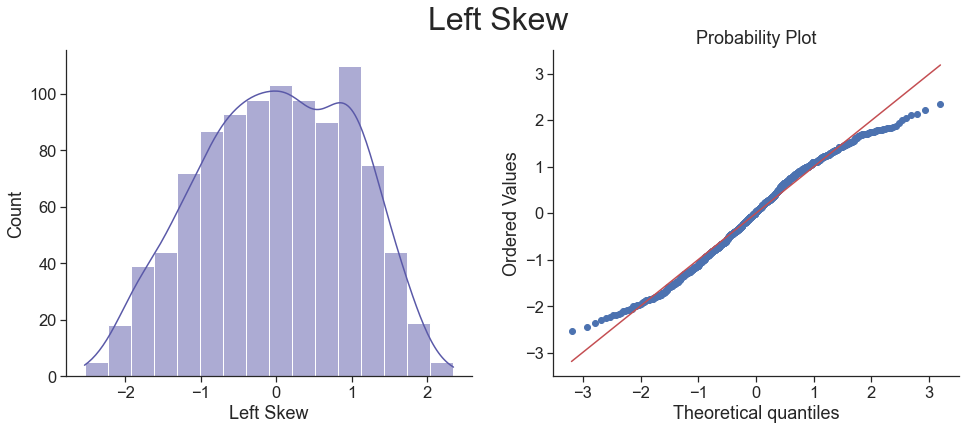

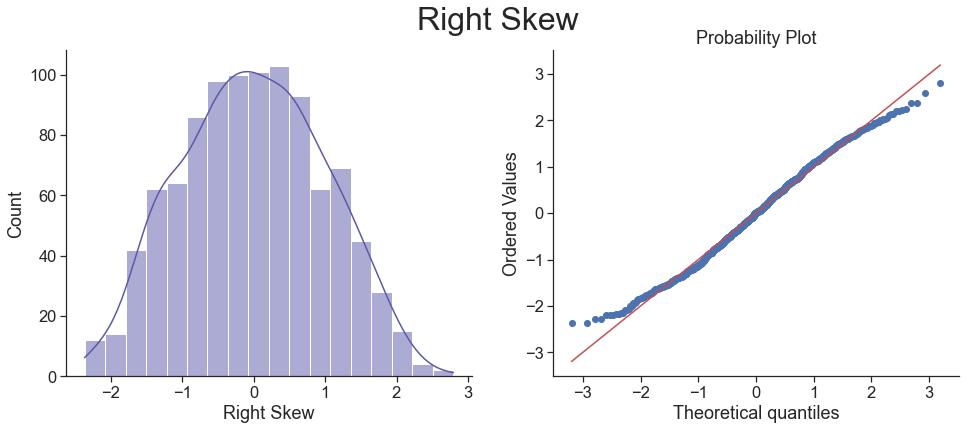

In [26]:
df_box = df + abs(df.min().to_numpy()) + 1

pt = PowerTransformer(method='box-cox')
box_data = pt.fit_transform(df_box)
box_df = pd.DataFrame(data=box_data, columns=df.columns)

for i in box_df.columns:
    plt.suptitle(i)
    plot_qq(box_df, i)
    

<h2 style="color:#E14C92">Yeo-Johnson Transformation</h2>

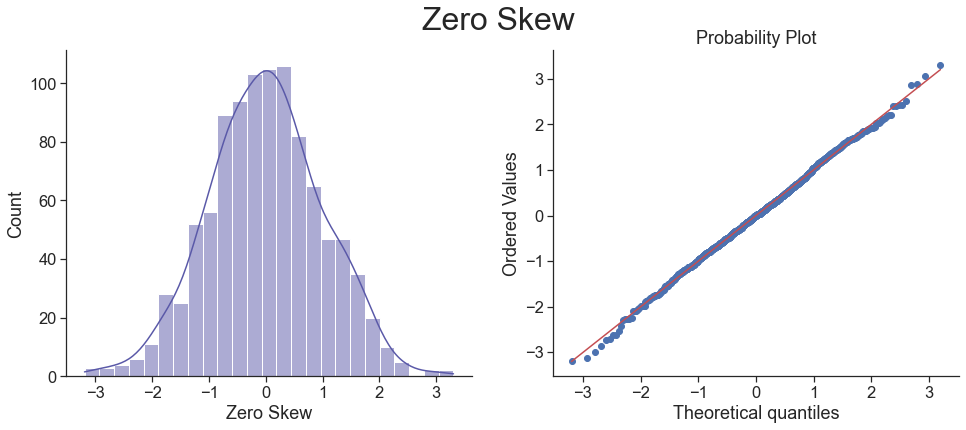

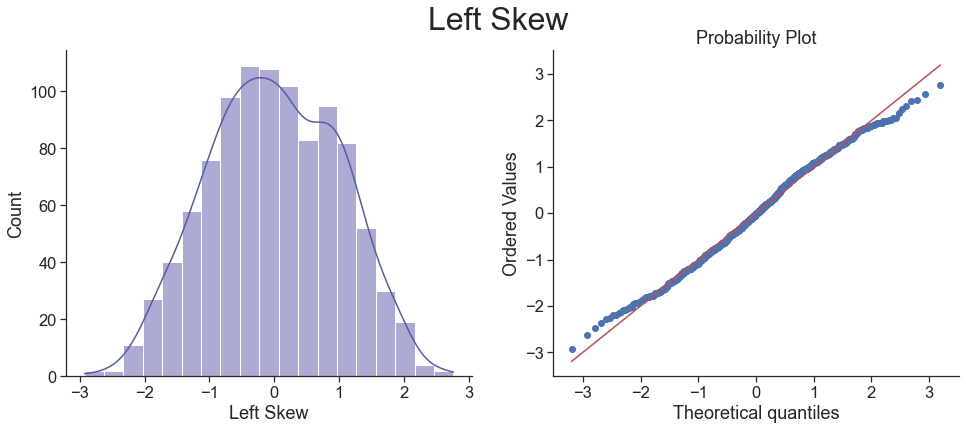

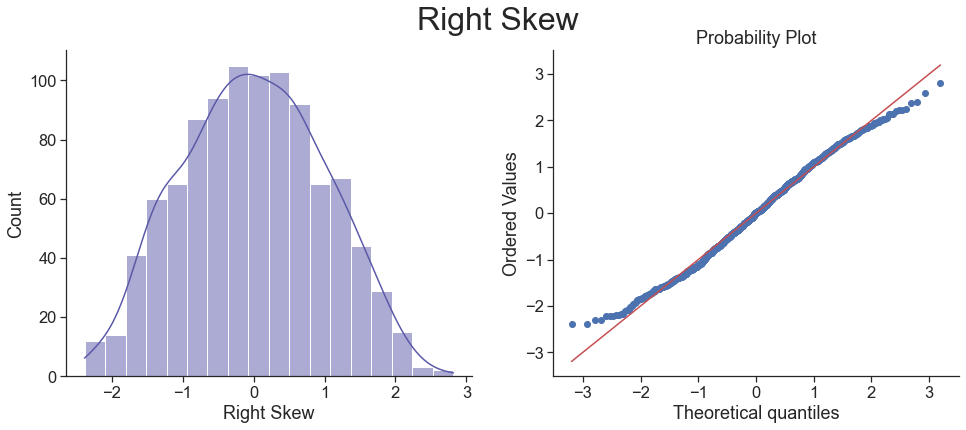

In [27]:
pt = PowerTransformer(method='yeo-johnson')
yj_data = pt.fit_transform(df)
yj_df = pd.DataFrame(data=yj_data, columns=df.columns)

for i in yj_df.columns:
    plt.suptitle(i)
    plot_qq(yj_df, i)

<h2 style="color:#E14C92">Quantile Transformation</h2>

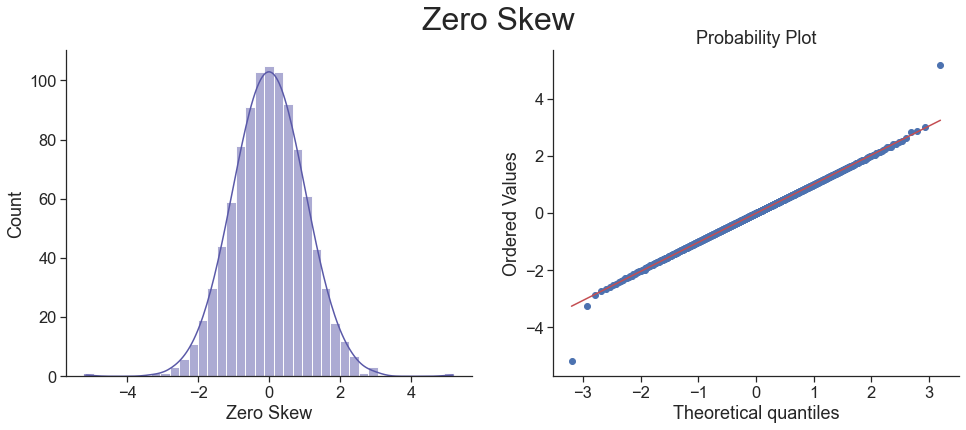

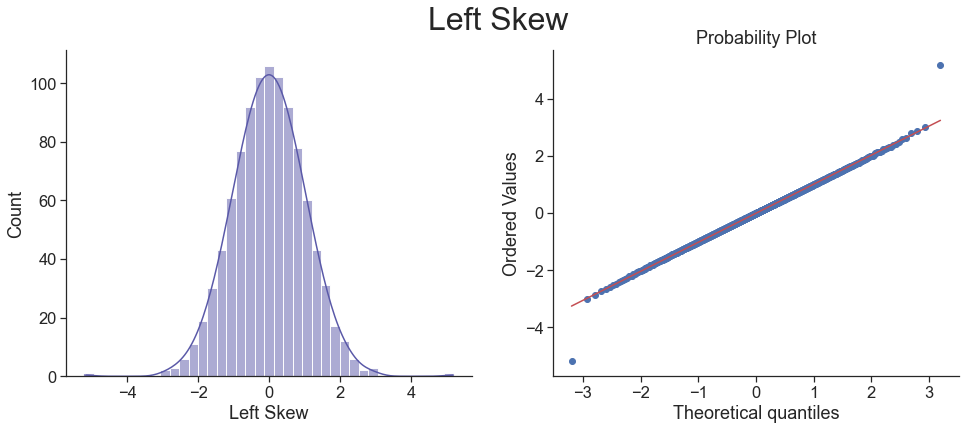

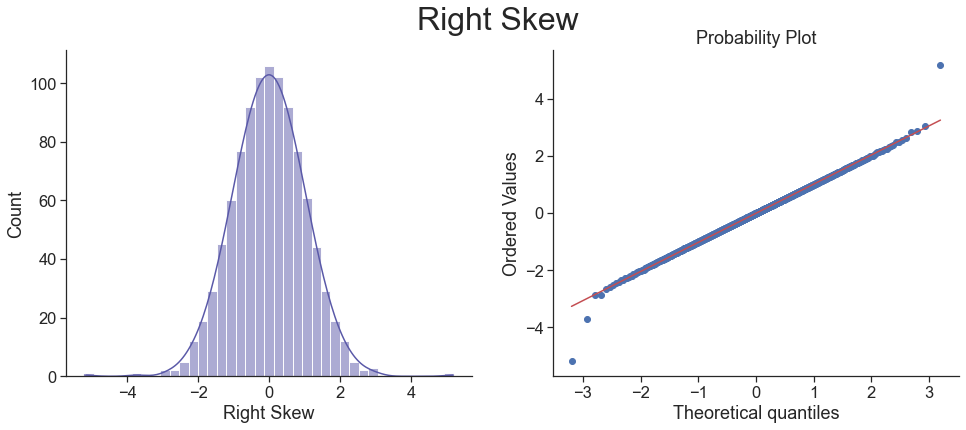

In [28]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
qt_data = qt.fit_transform(df)
qt_df = pd.DataFrame(data=qt_data, columns=df.columns)

for i in qt_df.columns:
    plt.suptitle(i)
    plot_qq(qt_df, i)

<center><font size=5 color="#4E4F75"> How did </font> 
<font color="#5A59A8" size=5><b>Box-Cox Transformation, </b></font>
<font color="#E14C92" size=5><b>Yeo-Johnson Transformation, </b></font>
<font size=5 color="#4E4F75"> and </font>
<font color="#0094AD" size=5><b>Quantile Transformation </b></font>
<font size=5 color="#4E4F75"> change the features?</font> </center>

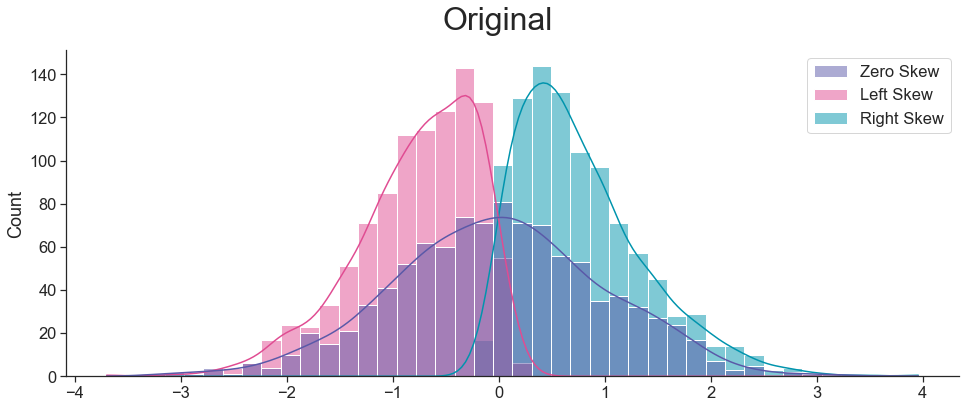

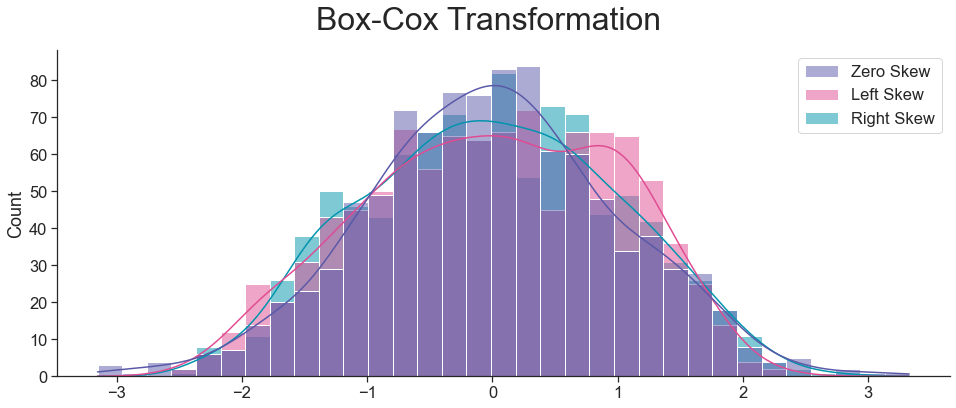

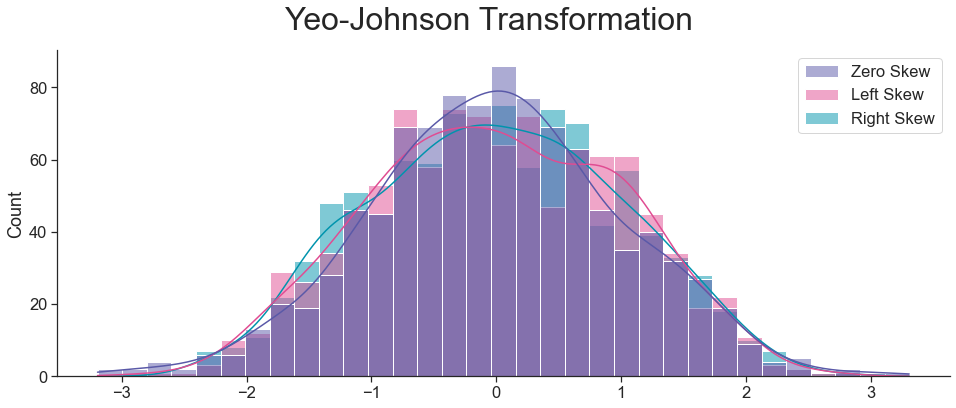

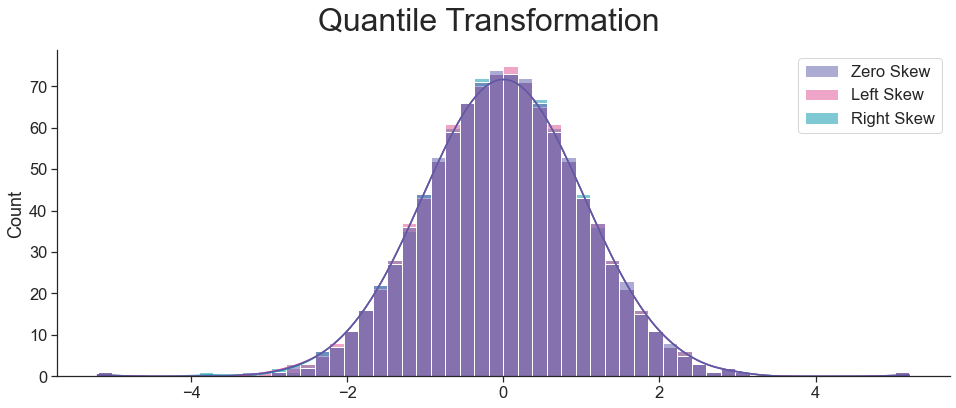

In [29]:
power_dict = {'Original': df,
              'Box-Cox Transformation': box_df,
              'Yeo-Johnson Transformation': yj_df,
              'Quantile Transformation': qt_df}

for k,v in power_dict.items():
    plt.subplots(1, 1)
    sns.histplot(v, kde=True)
    plt.suptitle(k)



<center><font color="#5A59A8" size=5><b>Quantile Transformation </b></font>
<font size=5 color="#4E4F75"> vs </font>
<font color="#E14C92" size=5><b>Power Transformation </b></font></center>

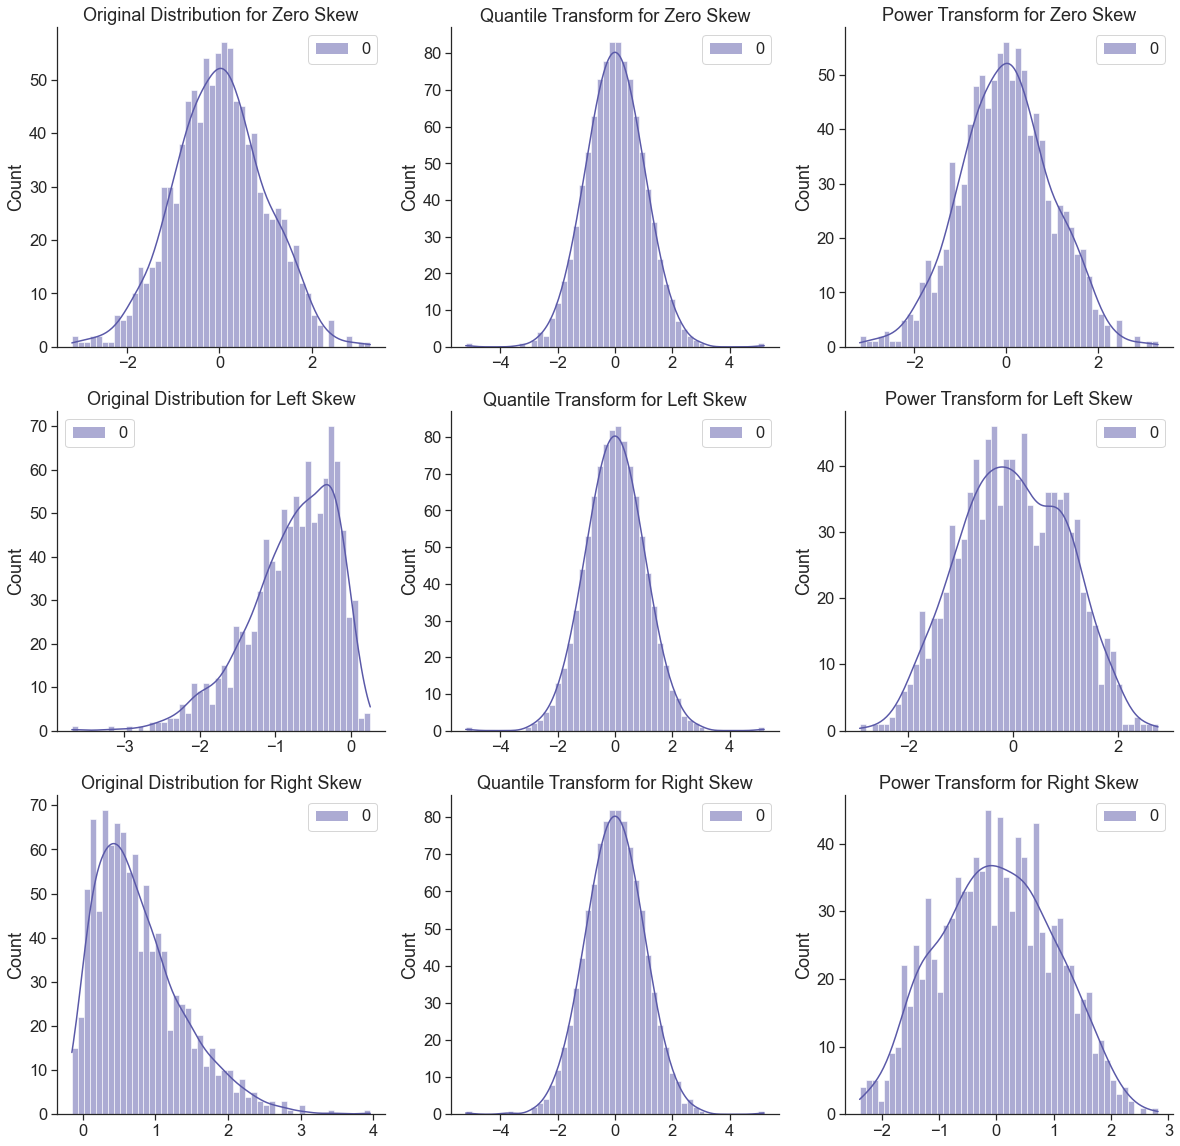

In [30]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,20))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins=50, kde=True, color=custom_palette[0])
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins=50, kde=True, color=custom_palette[1])
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins=50, kde=True, color=custom_palette[2])
        plt.title(f"Power Transform for {i}")
        j += 3
        
test_transformers(df.columns)


Observations:
1. Power Transformations: Box-Cox and Yeo-Johnson performs well in converting a skewed distribution into a normal distribution.
2. Box-Cox Transformation cannot be used with negative values.
3. Yeo-Johnson performs the same as Box-Cox Transformation but it can handle negative values.
4. Visually, Quantile Transformation performs better than Power Transformation

<center><font size=5 color="#4E4F75"> Predicting Wine Class using the  </font>
<font color="#5A59A8" size=5><b>Transformed Data </b></font></center>

<h2 style="color:#E14C92">Loading Wines Data</h2>

In [31]:
#Reloading wines data

X = load_wine(as_frame=True).data
y = load_wine(as_frame=True).target
df_wines = X.copy()
df_wines['target'] = y
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(X, y, test_size=0.25, random_state=214)

display(df_wines.head(5))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [32]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
orig_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='saga'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 10-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    orig_df = pd.concat([orig_df, best_score])
orig_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
6.000000,0.002200,0.000510,0.795357,0.023643,0.752747,0.114016,KNeighborsClassifier
0.100000,0.025504,0.002122,0.962409,0.009321,0.948352,0.066126,LogisticRegression
0.100000,0.013702,0.002283,0.676723,0.014727,0.678022,0.112529,LogisticRegression
1.500000,0.015703,0.000459,0.891296,0.075446,0.918681,0.068353,LinearSVC
3.000000,0.016903,0.002023,1.000000,0.000000,0.977473,0.034441,LinearSVC


<h2 style="color:#E14C92">Standard Scaler</h2>

In [33]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
SS_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', StandardScaler()), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 10-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    SS_df = pd.concat([SS_df, best_score])
SS_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
3.000000,0.003450,0.000472,0.973291,0.010402,0.978022,0.046363,KNeighborsClassifier
0.100000,0.007201,0.000714,0.994986,0.004094,0.978022,0.046363,LogisticRegression
1000.000000,0.004501,0.000447,1.000000,0.000000,0.977473,0.034441,LogisticRegression
1.000000,0.003601,0.000300,1.000000,0.000000,0.970330,0.036380,LinearSVC
100.000000,0.014103,0.006289,1.000000,0.000000,0.977473,0.034441,LinearSVC


<h2 style="color:#E14C92">Min-Max Scaler</h2>

In [34]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
MM_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', MinMaxScaler()), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    MM_df = pd.concat([MM_df, best_score])
MM_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
11.000000,0.003200,0.000245,0.977451,0.005338,0.978022,0.046363,KNeighborsClassifier
1.000000,0.010852,0.004595,0.989139,0.005345,0.978022,0.046363,LogisticRegression
100.000000,0.009002,0.001184,1.000000,0.000000,0.977473,0.034441,LogisticRegression
10.000000,0.005551,0.000568,1.000000,0.000000,0.977473,0.034441,LinearSVC
10.000000,0.017003,0.002122,1.000000,0.000000,0.977473,0.034441,LinearSVC


<h2 style="color:#E14C92">Robust Scaler</h2>

In [35]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
Rb_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', RobustScaler()), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    Rb_df = pd.concat([Rb_df, best_score])
Rb_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
17.000000,0.005551,0.000415,0.975770,0.006981,0.978022,0.046363,KNeighborsClassifier
0.100000,0.009902,0.002756,0.996667,0.004082,0.970330,0.048414,LogisticRegression
1000.000000,0.007301,0.002272,1.000000,0.000000,0.977473,0.034441,LogisticRegression
1.500000,0.006901,0.003734,1.000000,0.000000,0.977473,0.034441,LinearSVC
300.000000,0.013252,0.002533,1.000000,0.000000,0.977473,0.034441,LinearSVC


<h2 style="color:#E14C92">Log Transformation</h2>

In [36]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
log1p_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', MinMaxScaler()), ('transformer', FunctionTransformer(np.log1p)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    log1p_df = pd.concat([log1p_df, best_score])
log1p_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
6.000000,0.003051,0.000415,0.979139,0.010694,0.978022,0.046363,KNeighborsClassifier
0.750000,0.008502,0.001517,0.984965,0.003334,0.978022,0.046363,LogisticRegression
5.000000,0.005801,0.000400,0.999167,0.002500,0.970330,0.048414,LogisticRegression
1.500000,0.003450,0.000415,0.994153,0.005343,0.970879,0.047903,LinearSVC
1.500000,0.008501,0.001025,0.997500,0.003819,0.985165,0.029696,LinearSVC


<h2 style="color:#E14C92">Reciprocal Transformation</h2>

In [37]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
recipro_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', FunctionTransformer(np.reciprocal)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    recipro_df = pd.concat([recipro_df, best_score])
recipro_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
1.000000,0.001700,0.000245,1.000000,0.000000,0.864835,0.109786,KNeighborsClassifier
100.000000,0.024954,0.004694,0.980784,0.005346,0.955495,0.036401,LogisticRegression
100.000000,0.030355,0.004707,0.987465,0.005627,0.970330,0.036380,LogisticRegression
10.000000,0.012302,0.004280,0.974951,0.009837,0.962637,0.037411,LinearSVC
5000.000000,0.016003,0.002324,1.000000,0.000000,0.963187,0.048777,LinearSVC


<h2 style="color:#E14C92">Square Transformation</h2>

In [38]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
square_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', MinMaxScaler()), ('transformer', FunctionTransformer(np.square)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    square_df = pd.concat([square_df, best_score])
square_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
11.000000,0.003201,0.000400,0.954909,0.013998,0.940110,0.055733,KNeighborsClassifier
15.000000,0.010752,0.000873,0.993319,0.005005,0.955495,0.050084,LogisticRegression
100.000000,0.005951,0.000415,1.000000,0.000000,0.969780,0.037042,LogisticRegression
3.000000,0.003751,0.000403,0.994993,0.005532,0.962637,0.037411,LinearSVC
5000.000000,0.005551,0.000269,1.000000,0.000000,0.962637,0.037411,LinearSVC


<h2 style="color:#E14C92">Square Root Transformation</h2>

In [39]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
squart_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', FunctionTransformer(np.sqrt)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    squart_df = pd.concat([squart_df, best_score])
squart_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
4.000000,0.002051,0.000150,0.941541,0.007330,0.941209,0.062698,KNeighborsClassifier
15.000000,0.023354,0.002420,0.990812,0.002493,0.970330,0.036380,LogisticRegression
15.000000,0.054610,0.008838,0.997500,0.003819,0.970330,0.048414,LogisticRegression
1.000000,0.011902,0.003383,0.979951,0.004086,0.970330,0.036380,LinearSVC
100.000000,0.025205,0.003157,1.000000,0.000000,0.977473,0.034441,LinearSVC


<h2 style="color:#E14C92">Box-Cox Transformation</h2>

In [40]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
boxcox_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', PowerTransformer(method='box-cox')), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    boxcox_df = pd.concat([boxcox_df, best_score])
boxcox_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
5.000000,0.022754,0.003445,0.978298,0.006632,0.978022,0.046363,KNeighborsClassifier
0.100000,0.025104,0.002300,0.992479,0.002507,0.970330,0.048414,LogisticRegression
3.000000,0.021254,0.002053,1.000000,0.000000,0.985165,0.029696,LogisticRegression
0.200000,0.020203,0.002283,1.000000,0.000000,0.978022,0.033602,LinearSVC
0.100000,0.023254,0.006471,0.992479,0.002507,0.985165,0.029696,LinearSVC


<h2 style="color:#E14C92">Yeo-Johnson Transformation</h2>

In [41]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
yeo_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', StandardScaler()), ('transformer', PowerTransformer(method='yeo-johnson')), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    yeo_df = pd.concat([yeo_df, best_score])
yeo_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
3.000000,0.031806,0.007272,0.962437,0.011895,0.970879,0.047903,KNeighborsClassifier
0.100000,0.031406,0.004827,0.992479,0.002507,0.970330,0.048414,LogisticRegression
1.500000,0.029305,0.003803,1.000000,0.000000,0.985165,0.029696,LogisticRegression
0.100000,0.027705,0.001706,0.994986,0.004094,0.970879,0.047903,LinearSVC
0.100000,0.027805,0.001764,0.992479,0.002507,0.985165,0.029696,LinearSVC


<h2 style="color:#E14C92">Quantile Transformation</h2>

In [42]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
quantile_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', QuantileTransformer(n_quantiles=133, output_distribution='normal')), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    quantile_df = pd.concat([quantile_df, best_score])
quantile_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
3.000000,0.014902,0.003048,0.973291,0.009687,0.940659,0.043667,KNeighborsClassifier
0.400000,0.017803,0.002542,1.000000,0.000000,0.962637,0.050823,LogisticRegression
0.100000,0.028355,0.007812,0.992486,0.004490,0.976923,0.049255,LogisticRegression
0.100000,0.018653,0.003668,0.998333,0.003333,0.970330,0.036380,LinearSVC
3.000000,0.019953,0.006020,1.000000,0.000000,0.985165,0.029696,LinearSVC


<h2 style="color:#E14C92">Summary of Results for Wines Dataset</h2>

In [43]:
scores_df = pd.DataFrame({'Original': orig_df.set_index('model')['mean_val_score']})
scores_df['Standard Scaler'] = SS_df['mean_val_score'].to_numpy()
scores_df['MinMax Scaler'] = MM_df['mean_val_score'].to_numpy()
scores_df['Robust Scaler'] = Rb_df['mean_val_score'].to_numpy()
scores_df['Log'] = log1p_df['mean_val_score'].to_numpy()
scores_df['Reciprocal'] = recipro_df['mean_val_score'].to_numpy()
scores_df['Square'] = square_df['mean_val_score'].to_numpy()
scores_df['Square Root'] = squart_df['mean_val_score'].to_numpy()
scores_df['Box-Cox'] = boxcox_df['mean_val_score'].to_numpy()
scores_df['Yeo-Johnson'] = yeo_df['mean_val_score'].to_numpy()
scores_df['Quantile'] = quantile_df['mean_val_score'].to_numpy()

scores_df

,Original,Standard Scaler,MinMax Scaler,Robust Scaler,Log,Reciprocal,Square,Square Root,Box-Cox,Yeo-Johnson,Quantile
model,,,,,,,,,,,
KNeighborsClassifier,0.752747,0.978022,0.978022,0.978022,0.978022,0.864835,0.940110,0.941209,0.978022,0.970879,0.940659
LogisticRegression,0.948352,0.978022,0.978022,0.970330,0.978022,0.955495,0.955495,0.970330,0.970330,0.970330,0.962637
LogisticRegression,0.678022,0.977473,0.977473,0.977473,0.970330,0.970330,0.969780,0.970330,0.985165,0.985165,0.976923
LinearSVC,0.918681,0.970330,0.977473,0.977473,0.970879,0.962637,0.962637,0.970330,0.978022,0.970879,0.970330
LinearSVC,0.977473,0.977473,0.977473,0.977473,0.985165,0.963187,0.962637,0.977473,0.985165,0.985165,0.985165


<center><font size=5 color="#4E4F75"> Predicting Iris Class using the  </font>
<font color="#5A59A8" size=5><b>Transformed Data </b></font></center>

<h2 style="color:#E14C92">Loading Iris Dataset</h2>

In [44]:
iris = load_iris()
iris.data

#Reloading wines data

X = load_iris(as_frame=True).data
y = load_iris(as_frame=True).target
df_iris = X.copy()
df_iris['target'] = y
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(X, y, test_size=0.25, random_state=214)

display(df_iris.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100000,3.500000,1.400000,0.200000,0
1,4.900000,3.000000,1.400000,0.200000,0
2,4.700000,3.200000,1.300000,0.200000,0
3,4.600000,3.100000,1.500000,0.200000,0
4,5.000000,3.600000,1.400000,0.200000,0


In [45]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
orig_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='saga'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 10-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    orig_df = pd.concat([orig_df, best_score])
orig_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
6.000000,0.001800,0.000245,0.970248,0.008879,0.965152,0.056712,KNeighborsClassifier
15.000000,0.021504,0.001747,0.987099,0.004561,0.965152,0.056712,LogisticRegression
0.400000,0.008551,0.005885,0.979178,0.005308,0.974242,0.054229,LogisticRegression
5.000000,0.005201,0.000332,0.964287,0.007920,0.956818,0.057100,LinearSVC
1.500000,0.007101,0.002635,0.963307,0.007706,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Standard Scaler</h2>

In [46]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
SS_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', StandardScaler()), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 10-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    SS_df = pd.concat([SS_df, best_score])
SS_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
19.000000,0.003201,0.000458,0.960337,0.008790,0.973485,0.040550,KNeighborsClassifier
1000.000000,0.029105,0.015022,0.992079,0.003960,0.965909,0.056004,LogisticRegression
1000.000000,0.017803,0.005798,0.986139,0.009074,0.965152,0.042748,LogisticRegression
300.000000,0.008001,0.001000,0.973248,0.014013,0.956061,0.044018,LinearSVC
100.000000,0.005701,0.000980,0.979198,0.009329,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">MinMax Scaler</h2>

In [47]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
MM_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', MinMaxScaler()), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    MM_df = pd.concat([MM_df, best_score])
MM_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
5.000000,0.002851,0.000320,0.966277,0.007892,0.974242,0.039394,KNeighborsClassifier
5000.000000,0.018954,0.003283,0.991089,0.005332,0.965909,0.056004,LogisticRegression
20.000000,0.007251,0.002316,0.961327,0.006855,0.956061,0.044018,LogisticRegression
300.000000,0.006951,0.001350,0.966277,0.007892,0.965152,0.042748,LinearSVC
10.000000,0.008251,0.001953,0.961337,0.010276,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Robust Scaler</h2>

In [48]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
Rb_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', RobustScaler()), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    Rb_df = pd.concat([Rb_df, best_score])
Rb_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
10.000000,0.004501,0.001871,0.942475,0.013806,0.946970,0.059459,KNeighborsClassifier
15.000000,0.011202,0.001792,0.986129,0.006562,0.965152,0.042748,LogisticRegression
1000.000000,0.009452,0.002554,0.983168,0.009950,0.965152,0.042748,LogisticRegression
20.000000,0.010352,0.002618,0.960347,0.009832,0.956061,0.044018,LinearSVC
5.000000,0.005051,0.000522,0.961337,0.010276,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Log Transformation</h2>

In [49]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
log1p_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', MinMaxScaler()), ('transformer', FunctionTransformer(np.log1p)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    log1p_df = pd.concat([log1p_df, best_score])
log1p_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
6.000000,0.002650,0.000320,0.966287,0.006508,0.965909,0.056004,KNeighborsClassifier
300.000000,0.015303,0.003690,0.987119,0.007729,0.965152,0.042748,LogisticRegression
100.000000,0.017653,0.005896,0.966287,0.006508,0.956061,0.044018,LogisticRegression
100.000000,0.006551,0.000907,0.960337,0.007593,0.956061,0.044018,LinearSVC
20.000000,0.006651,0.000743,0.961327,0.006855,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Reciprocal Transformation</h2>

In [50]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
recipro_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', FunctionTransformer(np.reciprocal)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    recipro_df = pd.concat([recipro_df, best_score])
recipro_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
2.000000,0.001450,0.000350,0.972218,0.003992,0.946970,0.059459,KNeighborsClassifier
5000.000000,0.018253,0.002750,0.989109,0.006931,0.947727,0.069800,LogisticRegression
1000.000000,0.011352,0.001163,0.981188,0.012086,0.956818,0.057100,LogisticRegression
100.000000,0.005451,0.000568,0.962307,0.005916,0.956061,0.044018,LinearSVC
10.000000,0.006601,0.001530,0.965287,0.004892,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Square Transformation</h2>

In [51]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
square_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', MinMaxScaler()), ('transformer', FunctionTransformer(np.square)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    square_df = pd.concat([square_df, best_score])
square_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
4.000000,0.002850,0.000229,0.981158,0.002948,0.973485,0.040550,KNeighborsClassifier
5000.000000,0.016403,0.002458,0.991079,0.005334,0.974242,0.039394,LogisticRegression
1000.000000,0.008851,0.001963,0.984149,0.006559,0.974242,0.039394,LogisticRegression
100.000000,0.005851,0.001266,0.971248,0.008206,0.956061,0.044018,LinearSVC
100.000000,0.007501,0.002847,0.976218,0.007886,0.965152,0.042748,LinearSVC


<h2 style="color:#E14C92">Square Root Transformation</h2>

In [52]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
squart_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', FunctionTransformer(np.sqrt)), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    squart_df = pd.concat([squart_df, best_score])
squart_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
5.000000,0.001700,0.000332,0.964287,0.004848,0.973485,0.040550,KNeighborsClassifier
100.000000,0.022654,0.003835,0.986129,0.009070,0.973485,0.040550,LogisticRegression
10.000000,0.020003,0.001659,0.960337,0.007593,0.956061,0.044018,LogisticRegression
5.000000,0.006101,0.000490,0.965287,0.007971,0.956061,0.044018,LinearSVC
5.000000,0.005651,0.001050,0.957366,0.007634,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Box-Cox Transformation</h2>

In [53]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
boxcox_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', PowerTransformer(method='box-cox')), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    boxcox_df = pd.concat([boxcox_df, best_score])
boxcox_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
17.000000,0.010402,0.004685,0.943455,0.009936,0.947727,0.056737,KNeighborsClassifier
5.000000,0.013702,0.000781,0.982158,0.007415,0.973485,0.040550,LogisticRegression
1000.000000,0.022604,0.008035,0.986139,0.009074,0.965152,0.042748,LogisticRegression
15.000000,0.012252,0.001601,0.968267,0.007370,0.956061,0.044018,LinearSVC
5.000000,0.022354,0.011870,0.968257,0.005922,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Yeo-Johnson Transformation</h2>

In [54]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
yeo_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('scaler', StandardScaler()), ('transformer', PowerTransformer(method='yeo-johnson')), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    yeo_df = pd.concat([yeo_df, best_score])
yeo_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
15.000000,0.022154,0.015006,0.963297,0.008902,0.965152,0.042748,KNeighborsClassifier
1000.000000,0.028755,0.005179,0.992079,0.003960,0.965909,0.056004,LogisticRegression
1000.000000,0.029255,0.007841,0.993069,0.004537,0.965152,0.042748,LogisticRegression
5000.000000,0.015353,0.002134,0.946475,0.033744,0.965152,0.042748,LinearSVC
100.000000,0.013802,0.001792,0.977208,0.007700,0.965152,0.042748,LinearSVC


<h2 style="color:#E14C92">Quantile Transformation</h2>

In [55]:
# To use Pipeline, we just need to indicate a list of steps that we want to
# place inside it.
# In this case, we want to scale our features first, and then fit a Lasso model.
quantile_df = pd.DataFrame()
n_neighbors = range(1, 21)
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
         1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model_dict = {KNeighborsClassifier(): {'clf__n_neighbors': n_neighbors},
              LogisticRegression(penalty='l2'): {'clf__C': C},
              LogisticRegression(penalty='l1', solver='liblinear'): {'clf__C': C},
              LinearSVC(penalty='l2'): {'clf__C': C},
              LinearSVC(penalty='l1', loss='squared_hinge', dual=False): {'clf__C': C}}

for k, v in model_dict.items():
    steps = [('transformer', QuantileTransformer(n_quantiles=133, output_distribution='normal')), ('clf', k)]
    pipe = Pipeline(steps)

    # Next, we define a grid of hyperparameters for the chosen model.
    # In this case, we only want to finetune Lasso's alpha.

    param_grid = v

    # Let's use 5-fold CV.
    cv = 10

    # Let's use R^2 as our scoring method.
    scoring = 'accuracy'

    grid_search = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores

    # Time to fit on our X_trainval and y_trainval!
    grid_search.fit(X_trainval, y_trainval);

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    # Placing all the valuable information in a dataframe for better visualization
    cv_results = grid_search.__dict__['cv_results_']
    if v == {'clf__n_neighbors': n_neighbors}:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=n_neighbors)
    else:
        cv_results_df = pd.DataFrame(
            {'mean_fit_time': cv_results['mean_fit_time'],
             'std_fit_time': cv_results['std_fit_time'],
             'mean_train_score': cv_results['mean_train_score'],
             'std_train_score': cv_results['std_train_score'],
             'mean_val_score': cv_results['mean_test_score'],
             'std_val_score': cv_results['std_test_score']},
            index=C)
    
    best_score = cv_results_df.loc[cv_results_df['mean_val_score'] == cv_results_df['mean_val_score'].max()].iloc[0:1]
    best_score['model'] = re.findall(r'\b\w+\b(?=\()', str(k))
    quantile_df = pd.concat([quantile_df, best_score])
quantile_df

,mean_fit_time,std_fit_time,mean_train_score,std_train_score,mean_val_score,std_val_score,model
12.000000,0.008602,0.002809,0.960327,0.009912,0.956818,0.070095,KNeighborsClassifier
10.000000,0.021754,0.019121,0.984129,0.004855,0.974242,0.054229,LogisticRegression
10.000000,0.008552,0.002350,0.971228,0.005381,0.956061,0.044018,LogisticRegression
10.000000,0.029605,0.013244,0.972218,0.005995,0.956061,0.044018,LinearSVC
5.000000,0.009152,0.002730,0.973218,0.004528,0.956061,0.044018,LinearSVC


<h2 style="color:#E14C92">Summary of Results for Iris Dataset</h2>

In [56]:
scores_df_1 = pd.DataFrame({'Original': orig_df.set_index('model')['mean_val_score']})
scores_df_1['Standard Scaler'] = SS_df['mean_val_score'].to_numpy()
scores_df_1['MinMax Scaler'] = MM_df['mean_val_score'].to_numpy()
scores_df_1['Robust Scaler'] = Rb_df['mean_val_score'].to_numpy()
scores_df_1['Log'] = log1p_df['mean_val_score'].to_numpy()
scores_df_1['Reciprocal'] = recipro_df['mean_val_score'].to_numpy()
scores_df_1['Square'] = square_df['mean_val_score'].to_numpy()
scores_df_1['Square Root'] = squart_df['mean_val_score'].to_numpy()
scores_df_1['Box-Cox'] = boxcox_df['mean_val_score'].to_numpy()
scores_df_1['Yeo-Johnson'] = yeo_df['mean_val_score'].to_numpy()
scores_df_1['Quantile'] = quantile_df['mean_val_score'].to_numpy()

scores_df_1

,Original,Standard Scaler,MinMax Scaler,Robust Scaler,Log,Reciprocal,Square,Square Root,Box-Cox,Yeo-Johnson,Quantile
model,,,,,,,,,,,
KNeighborsClassifier,0.965152,0.973485,0.974242,0.946970,0.965909,0.946970,0.973485,0.973485,0.947727,0.965152,0.956818
LogisticRegression,0.965152,0.965909,0.965909,0.965152,0.965152,0.947727,0.974242,0.973485,0.973485,0.965909,0.974242
LogisticRegression,0.974242,0.965152,0.956061,0.965152,0.956061,0.956818,0.974242,0.956061,0.965152,0.965152,0.956061
LinearSVC,0.956818,0.956061,0.965152,0.956061,0.956061,0.956061,0.956061,0.956061,0.956061,0.965152,0.956061
LinearSVC,0.956061,0.956061,0.956061,0.956061,0.956061,0.956061,0.965152,0.956061,0.956061,0.965152,0.956061


<h1 style="color:#5A59A8">Results and Discussions</h1>

In [57]:
display(scores_df, scores_df_1)

,Original,Standard Scaler,MinMax Scaler,Robust Scaler,Log,Reciprocal,Square,Square Root,Box-Cox,Yeo-Johnson,Quantile
model,,,,,,,,,,,
KNeighborsClassifier,0.752747,0.978022,0.978022,0.978022,0.978022,0.864835,0.940110,0.941209,0.978022,0.970879,0.940659
LogisticRegression,0.948352,0.978022,0.978022,0.970330,0.978022,0.955495,0.955495,0.970330,0.970330,0.970330,0.962637
LogisticRegression,0.678022,0.977473,0.977473,0.977473,0.970330,0.970330,0.969780,0.970330,0.985165,0.985165,0.976923
LinearSVC,0.918681,0.970330,0.977473,0.977473,0.970879,0.962637,0.962637,0.970330,0.978022,0.970879,0.970330
LinearSVC,0.977473,0.977473,0.977473,0.977473,0.985165,0.963187,0.962637,0.977473,0.985165,0.985165,0.985165


,Original,Standard Scaler,MinMax Scaler,Robust Scaler,Log,Reciprocal,Square,Square Root,Box-Cox,Yeo-Johnson,Quantile
model,,,,,,,,,,,
KNeighborsClassifier,0.965152,0.973485,0.974242,0.946970,0.965909,0.946970,0.973485,0.973485,0.947727,0.965152,0.956818
LogisticRegression,0.965152,0.965909,0.965909,0.965152,0.965152,0.947727,0.974242,0.973485,0.973485,0.965909,0.974242
LogisticRegression,0.974242,0.965152,0.956061,0.965152,0.956061,0.956818,0.974242,0.956061,0.965152,0.965152,0.956061
LinearSVC,0.956818,0.956061,0.965152,0.956061,0.956061,0.956061,0.956061,0.956061,0.956061,0.965152,0.956061
LinearSVC,0.956061,0.956061,0.956061,0.956061,0.956061,0.956061,0.965152,0.956061,0.956061,0.965152,0.956061


<center><img src="Scaler Summary.png"/></center>

Observations for Functions Transformation:
1. Function Transformations, specifically Log, Reciprocal, Square, and Square Root, does not work well with negative values. Hence data should be shifted.
2. We can shift the data by adding the minimum value and 1.
3. Log Transformation, Reciprocal Transformation, and Square Root Transformation works well with right skewed data.
4. Square Transformation works well with left skewed data.
5. Square Root Transformation is weaker than Log Transformation and Reciprocal Transformation.

Observations for Power Transformation and Quantile:
1. Power Transformations: Box-Cox and Yeo-Johnson performs well in converting a skewed distribution into a normal distribution.
2. Box-Cox Transformation cannot be used with negative values.
3. Yeo-Johnson performs the same as Box-Cox Transformation but it can handle negative values.
4. Visually, Quantile Transformation performs better than Power Transformation

<h2 style="color:#E14C92">Transformation Cheat Sheet Creation</h2>

<center><img src="Cheat Sheet.png"/></center>

<h1 style="color:#5A59A8">Conclusion and Recommendation</h1>

<center><img src="Conclusion.png"/></center>

<h1 style="color:#5A59A8">References</h1>

<a id="ref2" href="https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/#:~:text=What%20is%20Feature%20Transformation%3F,useful%20for%20our%20further%20analysis.">[1] Goyal, C. (2021, May 6). Feature Transformations in Data Science: A Detailed Walkthrough. https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/#:~:text=What%20is%20Feature%20Transformation%3F,useful%20for%20our%20further%20analysis.</a>

<a id="ref2" href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution">[2] Changyong Feng, et.al. (2014, Apr 26). Log-transformation and its implications for data analysis. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution.</a>

<a id="ref2" href="https://www.statisticshowto.com/transformations-2/">[3] Stephanie Glen. "Transformations: Log, Reciprocal, Vector, Linear…" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/transformations-2/</a>

<a id="ref2" href="http://fmwww.bc.edu/repec/bocode/t/transint.html">[2] Cox, N. (2007, Jul 25). Transformations: an introduction. http://fmwww.bc.edu/repec/bocode/t/transint.html</a>

<a id="ref2" href="https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9">[5] Tamil Selvan S, et.al. (2020, May 29). Types Of Transformations For Better Normal Distribution. https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9</a>

<a id="ref2" href="https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/">[6] Stephanie Glen. "Box Cox Transformation: Definition, Examples" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/</a>

<a id="ref2" href="https://www.stat.umn.edu/arc/yjpower.pdf">[7] Sanford Weisberg. (2001, Oct 26). "Yeo-Johnson Power Transformations. https://www.stat.umn.edu/arc/yjpower.pdf</a>

<a id="ref2" href="https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed">[8] Akalbir Singh Chadha. (2021, Jul 12). What Do Normalization and Standardization Mean? When to Normalize Data and When to Standardize Data? https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed</a>

<a id="ref2" href="https://machinelearninggeek.com/feature-scaling-minmax-standard-and-robust-scaler/">[9] Pallavi Pandey. (2020, Nov 5). Feature Scaling: MinMax, Standard and Robust Scaler. https://machinelearninggeek.com/feature-scaling-minmax-standard-and-robust-scaler/</a>

<a id="ref2" href="https://www.oreilly.com/library/view/python-feature-engineering/9781789806311/c5983ea1-338e-4a09-be1c-a8a06f0fb5b9.xhtml">[10] Soledad Galli. Python Feature Engineering Cookbook. https://www.oreilly.com/library/view/python-feature-engineering/9781789806311/c5983ea1-338e-4a09-be1c-a8a06f0fb5b9.xhtml</a>

<a id="ref2" href="https://www.bibliography.com/apa/how-to-cite-a-website-with-no-author-in-apa/#:~:text=How%20do%20you%20cite%20a,website%20title%20is%20in%20italics.">[11] What is data transformation: definition, benefits, and uses. Stitch: A Talent Product. https://www.bibliography.com/apa/how-to-cite-a-website-with-no-author-in-apa/#:~:text=How%20do%20you%20cite%20a,website%20title%20is%20in%20italics.</a>